In [1]:
import pandas as pd
import time
import requests
import urllib3
import re
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import unicodedata as ud

In [2]:
# access_token='github_pat_11A2NF6WY0WsjaH7QBvrHm_hm'
headers = {'Authorization':"Token "+access_token} 

M10Uvpxhnu77YbpvYiP9Dc50JhgpSJjw47Kxy4j744VNXVKZSVUhCfmnt

In [3]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [4]:
def label_info(repository):
    page_num = 1
    labels = []
    while page_num < 11:
        try:
            url = f"https://api.github.com/repos/{repository}/labels?per_page=100&page={page_num}"
            label = requests.get(url,headers=headers,verify=False).json()
            result = label
            if result == []:
                page_num = 100
            else:
                labels.append(label)
                page_num = page_num + 1
        except:
            time.sleep(90)
            continue
    label_id = []
    label_node_id = []
    label_url = []
    label_name = []
    label_color = []
    label_default = []
    label_description = []
    for page in labels:
        for label in page:
            try:
                label_id.append(label['id'])
                label_node_id.append(label['node_id'])
                label_url.append(label['url'])
                label_name.append(label['name'])
                label_color.append(label['color'])
                label_default.append(label['default'])
                label_description.append(label['description'])
            except:
                pass
    label_data=pd.DataFrame()
    label_data['label_id']=label_id
    label_data['label_node_id']=label_node_id
    label_data['label_url']=label_url
    label_data['label_name']=label_name
    label_data['label_color']=label_color
    label_data['label_default']=label_default
    label_data['label_description']=label_description
    label_data=label_data.reset_index().drop(columns='index')
    return label_data

In [5]:
initial_repolist = pd.read_pickle('/Users/isdeniz/Documents/github/231008-initial-repolist-count-info.pkl')

In [6]:
print('total_issue_count: ',initial_repolist['issue_count'].sum())
print('total_open_issue_count: ',initial_repolist['open_issue_count'].sum())
print('total_closed_issue_count: ',initial_repolist['closed_issue_count'].sum())
print('total_pr_count: ',initial_repolist['pr_count'].sum())
print('total_open_pr_count: ',initial_repolist['open_pr_count'].sum())
print('total_closed_pr_count: ',initial_repolist['closed_pr_count'].sum())
print('total_commit_count: ',initial_repolist['commit_count'].sum())
print('total_release_count: ',initial_repolist['release_count'].sum())

total_issue_count:  480134.0
total_open_issue_count:  66878.0
total_closed_issue_count:  413256.0
total_pr_count:  460956.0
total_open_pr_count:  12176.0
total_closed_pr_count:  448780.0
total_commit_count:  2227380.0
total_release_count:  8249.0


Selecting the repositories satisfying thresholds in terms of the number of issues, pull requests, commits, and releases

In [7]:
repolist = initial_repolist[(initial_repolist.issue_count >= 1000) & (initial_repolist.pr_count >= 1000) & (initial_repolist.commit_count >= 1000) & (initial_repolist.release_count >= 50)]
repolist = repolist.reset_index(drop = True)
repolist.shape[0]

32

In [8]:
repolist

,repository_name,created_at,stargazers_count,watchers_count,open_issue_count,closed_issue_count,issue_count,open_pr_count,closed_pr_count,pr_count,commit_count,release_count
0,facebook/react-native,2015-01-09T18:10:16Z,112304.0,3631.0,1583.0,23680.0,25263.0,280.0,13956.0,14236.0,29273.0,276.0
1,spring-projects/spring-boot,2012-10-19T15:02:57Z,69590.0,3367.0,631.0,30825.0,31456.0,23.0,5850.0,5873.0,45478.0,249.0
2,elastic/elasticsearch,2010-02-08T13:20:56Z,65337.0,2680.0,3935.0,29241.0,33176.0,555.0,66416.0,66971.0,72450.0,123.0
3,spring-projects/spring-framework,2010-12-08T04:04:45Z,53315.0,3370.0,818.0,23309.0,24127.0,58.0,4351.0,4409.0,28190.0,268.0
4,ReactiveX/RxJava,2013-01-08T20:11:48Z,47252.0,2241.0,17.0,3119.0,3136.0,0.0,3799.0,3799.0,6051.0,233.0
5,apache/dubbo,2012-06-19T07:56:02Z,39423.0,3071.0,942.0,5546.0,6488.0,69.0,6459.0,6528.0,7125.0,90.0
6,dbeaver/dbeaver,2015-10-21T08:26:28Z,34008.0,514.0,1778.0,13556.0,15334.0,35.0,4522.0,4557.0,24773.0,184.0
7,halo-dev/halo,2018-03-21T12:56:52Z,28903.0,473.0,298.0,2515.0,2813.0,8.0,1662.0,1670.0,4514.0,136.0
8,SeleniumHQ/selenium,2013-01-14T21:40:56Z,27947.0,1320.0,189.0,9301.0,9490.0,55.0,3194.0,3249.0,30472.0,86.0
9,alibaba/nacos,2018-06-15T06:49:27Z,27620.0,912.0,244.0,7324.0,7568.0,28.0,3487.0,3515.0,4790.0,58.0


In [9]:
print('total_issue_count_of_selected_repos: ',repolist['issue_count'].sum())
print('total_open_issue_count_of_selected_repos: ',repolist['open_issue_count'].sum())
print('total_closed_issue_count_of_selected_repos: ',repolist['closed_issue_count'].sum())
print('total_pr_count_of_selected_repos: ',repolist['pr_count'].sum())
print('total_open_pr_count_of_selected_repos: ',repolist['open_pr_count'].sum())
print('total_closed_pr_count_of_selected_repos: ',repolist['closed_pr_count'].sum())
print('total_commit_count_of_selected_repos: ',repolist['commit_count'].sum())
print('total_release_count_of_selected_repos: ',repolist['release_count'].sum())

total_issue_count_of_selected_repos:  269376.0
total_open_issue_count_of_selected_repos:  28865.0
total_closed_issue_count_of_selected_repos:  240511.0
total_pr_count_of_selected_repos:  258711.0
total_open_pr_count_of_selected_repos:  3230.0
total_closed_pr_count_of_selected_repos:  255481.0
total_commit_count_of_selected_repos:  608033.0
total_release_count_of_selected_repos:  4582.0


In [10]:
issues = pd.read_pickle('/Users/isdeniz/Documents/github/231008-issues-time-label.pkl')

In [11]:
issues.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,user,labels,state,locked,assignee,assignees,milestone,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,body,reactions,timeline_url,performed_via_github_app,state_reason,score,repository_name,issue/pr,created_at_timestamp,closed_at_timestamp,issue_resolution_time,open_since,labels_id,labels_node_id,labels_name,labels_color,labels_default,labels_description
0,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,['https://api.github.com/repos/facebook/react-...,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,https://github.com/facebook/react-native/issues/2,55988530,MDU6SXNzdWU1NTk4ODUzMA==,2,`pthread.h` not found,"{'login': 'jlongster', 'id': 17031, 'node_id':...","[{'id': 998095527, 'node_id': 'MDU6TGFiZWw5OTg...",closed,True,None,[],None,2,2015-01-30T02:54:11Z,2018-07-23T05:02:58Z,2015-01-31T00:04:06Z,NONE,resolved,To build on my machine (OS X 10.9.3) targeting...,{'url': 'https://api.github.com/repos/facebook...,https://api.github.com/repos/facebook/react-na...,None,completed,1.0,facebook/react-native,issue,2015-01-30 02:54:11,2015-01-31 00:04:06,0.881887,NaN,[998095527],['MDU6TGFiZWw5OTgwOTU1Mjc='],['Resolution: Locked'],['ffffff'],[False],['This issue was locked by the bot.']
1,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,['https://api.github.com/repos/facebook/react-...,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,https://github.com/facebook/react-native/issues/4,56060794,MDU6SXNzdWU1NjA2MDc5NA==,4,Set UIStatusBarStyleLightContent,"{'login': 'nick', 'id': 939, 'node_id': 'MDQ6V...","[{'id': 998095527, 'node_id': 'MDU6TGFiZWw5OTg...",closed,True,None,[],None,26,2015-01-30T17:25:33Z,2018-07-23T05:02:58Z,2015-02-07T20:36:47Z,NONE,resolved,Is it possible to set the status bar to light?...,{'url': 'https://api.github.com/repos/facebook...,https://api.github.com/repos/facebook/react-na...,None,completed,1.0,facebook/react-native,issue,2015-01-30 17:25:33,2015-02-07 20:36:47,8.132801,NaN,[998095527],['MDU6TGFiZWw5OTgwOTU1Mjc='],['Resolution: Locked'],['ffffff'],[False],['This issue was locked by the bot.']
2,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,['https://api.github.com/repos/facebook/react-...,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,https://github.com/facebook/react-native/issues/5,56064994,MDU6SXNzdWU1NjA2NDk5NA==,5,Auto-refresh simulator,"{'login': 'nick', 'id': 939, 'node_id': 'MDQ6V...","[{'id': 998095527, 'node_id': 'MDU6TGFiZWw5OTg...",closed,True,None,[],None,28,2015-01-30T18:05:27Z,2018-07-23T05:02:58Z,2015-04-01T02:26:12Z,NONE,resolved,Is it possible to have the simulator automatic...,{'url': 'https://api.github.com/repos/facebook...,https://api.github.com/repos/facebook/react-na...,None,completed,1.0,facebook/react-native,issue,2015-01-30 18:05:27,2015-04-01 02:26:12,60.347743,NaN,[998095527],['MDU6TGFiZWw5OTgwOTU1Mjc='],['Resolution: Locked'],['ffffff'],[False],['This issue was locked by the bot.']
3,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,['https://api.github.com/repos/facebook/react-...,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,https://github.com/facebook/react-native/issues/7,56083155,MDU6SXNzdWU1NjA4MzE1NQ==,7,What are the guidelines for exposing native APIs?,"{'login': 'gaearon', 'id': 810438, 'node_id': ...","[{'id': 998095527, 'node_id': 'MDU6TGFiZWw5OTg...",closed,True,None,[],None,4,2015-01-30T20:51:21Z,2018-07-23T05:02:57Z,2015-02-07T20:37:20Z,CONTRIBUTOR,resolved,"This is not an issue per se, but something tha...",{'url': 'https://api.github.com/repos

In [12]:
issues.shape[0]

269188

In [13]:
issues['state'].value_counts()

state
closed    240528
open       28660
Name: count, dtype: int64

Open issues are dropped out

In [14]:
closed_df = issues[issues['state'] == 'closed']
closed_df = closed_df.reset_index(drop = True)

In [15]:
closed_df.shape[0]

240528

Issues that have no label are dropped out

In [16]:
closed_df[closed_df['labels_name'] == 'no_label'].shape[0]

42447

In [17]:
filtered_df = closed_df[closed_df['labels_name'] != 'no_label'].copy(deep = True).reset_index(drop = True)

In [18]:
filtered_df.shape[0]

198081

Considering labels of each repository

In [19]:
r = repolist['repository_name'].unique()

Getting the defined labels 

In [20]:
i = 0
labels_df = pd.DataFrame()
while i < repolist.shape[0]:
    repository = repolist.loc[i,'repository_name']
    new_labels = label_info(repository)
    labels_df = pd.concat([labels_df, new_labels], ignore_index = True)
    i = i + 1
repository_name = labels_df["label_url"].str.split("/", n = 6, expand = True)
repository_name2 = repository_name[4] + "/" + repository_name[5]
labels_df['repository_name'] = repository_name2
labels_df.head()

,label_id,label_node_id,label_url,label_name,label_color,label_default,label_description,repository_name
0,4884403361,LA_kwDOAbrxp88AAAABIyIUoQ,https://api.github.com/repos/facebook/react-na...,:open_umbrella: Umbrella,F5A351,False,To label issues that serve as coordination poi...,facebook/react-native
1,5649029891,LA_kwDOAbrxp88AAAABULVbAw,https://api.github.com/repos/facebook/react-na...,0.72,703D5F,False,,facebook/react-native
2,1207200873,MDU6TGFiZWwxMjA3MjAwODcz,https://api.github.com/repos/facebook/react-na...,Accessibility,ffffff,False,,facebook/react-native
3,2726583423,MDU6TGFiZWwyNzI2NTgzNDIz,https://api.github.com/repos/facebook/react-na...,Accessibility Team - Evaluated,21DAFA,False,,facebook/react-native
4,6827455872,LA_kwDOAbrxp88AAAABlvK1gA,https://api.github.com/repos/facebook/react-na...,amazon,ededed,False,None,facebook/react-native


In [21]:
labels_df.shape[0]

3095

In [22]:
import ast

def safe_eval(x):
    if x == 'no_label':
        return []
    try:
        return ast.literal_eval(x)
    except (SyntaxError, ValueError):
        return None

def label_details(repository):
    issues_temp = filtered_df.copy(deep = True)
    issues_temp = issues_temp[issues_temp['repository_name'] == repository]
    issues_temp = issues_temp.reset_index(drop = True)
    
    c = ['repository_name','label','count']

    l = pd.DataFrame(columns = c)

    issues_temp['labels_name'] = issues_temp['labels_name'].apply(safe_eval)
    issues_temp = issues_temp.dropna(subset = ['labels_name'])
    issues_temp_exploded = issues_temp.explode('labels_name').reset_index(drop = True)

    label_counts = issues_temp_exploded['labels_name'].value_counts().reset_index(name = 'countofissues')
    label_counts_sorted = label_counts.sort_values(by = 'countofissues', ascending = False)

    i = 0
    while i < label_counts_sorted.shape[0]:
            l.loc[i,'repository_name'] = repository
            l.loc[i,'label'] = label_counts_sorted.loc[i,'labels_name']
            l.loc[i,'count'] = label_counts_sorted.loc[i,'countofissues']
            i = i + 1

    return l 

In [23]:
label_issue_count = pd.DataFrame()
i = 0 
while i < repolist.shape[0]:
    new_label_issue_count = label_details(r[i])
    label_issue_count = pd.concat([label_issue_count, new_label_issue_count], ignore_index = True)
    i = i + 1 

In [24]:
no_labels = pd.DataFrame()
i = 0 
while i < repolist.shape[0]:
    repository = repolist.loc[i,'repository_name']
    issues_temp = filtered_df.copy(deep = True)
    issues_temp = issues_temp[issues_temp['repository_name'] == repository]
    issues_temp = issues_temp.reset_index(drop = True)
    no_labels.loc[i,'repository_name'] = repository
    no_labels.loc[i,'label'] = 'no_label'
    no_labels.loc[i,'count'] = issues_temp[issues_temp['labels_name'] == 'no_label'].shape[0]
    i = i + 1

In [25]:
label_issue_count = pd.concat([label_issue_count, no_labels], ignore_index = True)
label_issue_count = label_issue_count.reset_index(drop = True)
label_issue_count.head()

,repository_name,label,count
0,facebook/react-native,Resolution: Locked,17973
1,facebook/react-native,Ran Commands,5204
2,facebook/react-native,Stale,4035
3,facebook/react-native,Bug,3060
4,facebook/react-native,Needs: Triage :mag:,2687


In [26]:
label_issue_count = pd.merge(label_issue_count, labels_df,  how = 'left', left_on = ['repository_name','label'], right_on = ['repository_name','label_name'])
label_issue_count.head()

,repository_name,label,count,label_id,label_node_id,label_url,label_name,label_color,label_default,label_description
0,facebook/react-native,Resolution: Locked,17973,9.980955e+08,MDU6TGFiZWw5OTgwOTU1Mjc=,https://api.github.com/repos/facebook/react-na...,Resolution: Locked,ffffff,False,This issue was locked by the bot.
1,facebook/react-native,Ran Commands,5204,3.372173e+08,MDU6TGFiZWwzMzcyMTcyNTQ=,https://api.github.com/repos/facebook/react-na...,Ran Commands,ffffff,False,One of our bots successfully processed a command.
2,facebook/react-native,Stale,4035,7.182418e+08,MDU6TGFiZWw3MTgyNDE4MDc=,https://api.github.com/repos/facebook/react-na...,Stale,e99695,False,There has been a lack of activity on this issu...
3,facebook/react-native,Bug,3060,1.304118e+09,MDU6TGFiZWwxMzA0MTE3NTQ0,https://api.github.com/repos/facebook/react-na...,Bug,ffffff,False,
4,facebook/react-native,Needs: Triage :mag:,2687,1.794148e+09,MDU6TGFiZWwxNzk0MTQ4MzQ3,https://api.github.com/repos/facebook/react-na...,Needs: Triage :mag:,bfd4f2,False,


In [27]:
columns_to_drop = ['label_id', 'label_node_id','label_url','label_color','label_default','label_name']
label_issue_count.drop(columns = columns_to_drop, inplace = True)

In [28]:
last_column = label_issue_count.pop('label_description')
label_issue_count.insert(2, 'label_description', last_column)
label_issue_count.head()

,repository_name,label,label_description,count
0,facebook/react-native,Resolution: Locked,This issue was locked by the bot.,17973
1,facebook/react-native,Ran Commands,One of our bots successfully processed a command.,5204
2,facebook/react-native,Stale,There has been a lack of activity on this issu...,4035
3,facebook/react-native,Bug,,3060
4,facebook/react-native,Needs: Triage :mag:,,2687


In [29]:
def body_text_count(repository,text):
    issues_temp = filtered_df.copy(deep = True)
    issues_temp = issues_temp[issues_temp['repository_name'] == repository]
    issues_temp = issues_temp.reset_index(drop = True)

    issues_temp['text_info'] = issues_temp['body'].apply(lambda x: 'yes' if x is not None and text in x else 'no')
    print(f'number of issues with {text} in body: ', issues_temp[issues_temp['text_info'] == 'yes'].shape[0])
    
    return None

Label Mapping

In [32]:
filtered_df['mapLabel'] = 'roma'

Round 1 - Confidence = 100%

In [33]:
label_mapping_df_1 = pd.read_excel("/Users/isdeniz/Documents/github/label_mapping_round1.xlsx")
label_mapping_df_1.head()

,rule,src_project,src_project_label,mapLabel,confidence,defined_label_description,notes
0,0,facebook/react-native,Bug,bug,1,NaN,NaN
1,1,facebook/react-native,Impact: Bug,bug,1,The issue represents a bug somewhere,NaN
2,2,facebook/react-native,📮Known Issues,bug,1,This indicates an issue that refers to a bug o...,NaN
3,3,spring-projects/spring-boot,type: bug,bug,1,A general bug,NaN
4,4,elastic/elasticsearch,>bug,bug,1,NaN,NaN


In [34]:
def label_mapping(repository_name,labels_name,i,df_x):
    found_bug = False
    mapLabel = 'roma'
    if labels_name == 'no_label':
        mapLabel = 'no_label'
    else:
        if repository_name == df_x.loc[i,'src_project']:
            cell_value = labels_name
            search_text = df_x.loc[i,'src_project_label']
            cell_value_list = re.findall(r"'(.*?)'", cell_value)
            found_bug = search_text in cell_value_list
            if found_bug:
                mapLabel = df_x.loc[i,'mapLabel']
                #print(cell_value)
    return mapLabel

In [35]:
def remaining_label_details(repository):
    label_counts = filtered_df[filtered_df['repository_name'] == repository]['mapLabel'].value_counts().reset_index(name = 'countofissues')
    label_counts_sorted = label_counts.sort_values(by = 'countofissues', ascending = False)
    print(label_counts_sorted)
    issues_temp = filtered_df.copy(deep = True)
    issues_temp = issues_temp[issues_temp['repository_name'] == repository]
    issues_temp = issues_temp.reset_index(drop = True)
    issues_temp = issues_temp[issues_temp['mapLabel'] == 'roma']
    issues_temp = issues_temp.reset_index(drop = True)
    
    c = ['repository_name','label','count','percentage']

    l = pd.DataFrame(columns=c)

    issues_temp['labels_name'] = issues_temp['labels_name'].apply(safe_eval)
    issues_temp = issues_temp.dropna(subset = ['labels_name'])
    issues_temp_exploded = issues_temp.explode('labels_name').reset_index(drop = True)

    label_counts = issues_temp_exploded['labels_name'].value_counts().reset_index(name = 'countofissues')
    label_counts_sorted = label_counts.sort_values(by = 'countofissues', ascending = False)

    i = 0
    while i < label_counts_sorted.shape[0]:
            l.loc[i,'repository_name'] = repository
            l.loc[i,'label'] = label_counts_sorted.loc[i,'labels_name']
            l.loc[i,'count'] = label_counts_sorted.loc[i,'countofissues']
            l.loc[i,'percentage'] = l.loc[i,'count'] / issues_temp.shape[0]
            i = i + 1

    return l.head(10)

In [36]:
def remaining_label_details_total():
    label_counts = filtered_df['mapLabel'].value_counts().reset_index(name = 'countofissues')
    label_counts_sorted = label_counts.sort_values(by = 'countofissues', ascending = False)
    label_counts_sorted['%'] = (label_counts_sorted['countofissues']/filtered_df.shape[0]) * 100
    print(label_counts_sorted)
    print(filtered_df.shape[0])

In [37]:
def remaining_label_details_total_df():
    label_counts = filtered_df['mapLabel'].value_counts().reset_index(name = 'countofissues')
    label_counts_sorted = label_counts.sort_values(by = 'countofissues', ascending = False)
    label_counts_sorted['%'] = (label_counts_sorted['countofissues']/filtered_df.shape[0]) * 100
    return label_counts_sorted

In [38]:
i = 0
while i < label_mapping_df_1.shape[0]:
    filtered_df.loc[filtered_df['mapLabel'] == 'roma', 'mapLabel'] = filtered_df.loc[filtered_df['mapLabel'] == 'roma'].apply(lambda row: label_mapping(row['repository_name'], row['labels_name'], i, label_mapping_df_1), axis = 1)
    i = i + 1 

In [39]:
remaining_label_details_total()

      mapLabel  countofissues          %
0         roma         104369  52.690061
1          bug          56397  28.471686
2  enhancement          26910  13.585351
3      feature           9642   4.867706
4  improvement            410   0.206986
5     proposal            345   0.174171
6   suggestion              8   0.004039
198081


In [40]:
df_result = remaining_label_details_total_df()
df_result

,mapLabel,countofissues,%
0,roma,104369,52.690061
1,bug,56397,28.471686
2,enhancement,26910,13.585351
3,feature,9642,4.867706
4,improvement,410,0.206986
5,proposal,345,0.174171
6,suggestion,8,0.004039


In [41]:
def get_new_labels(df, df_values, sizes, labels):
    new_labels = [label if size > df[f'{df_values}'].sum()*0.04 else '' for size, label in zip(sizes, labels)]
    return new_labels

custom_colors = ['#004d99', 
                 '#1a8cff', 
                 '#66b3ff','#66b3ff', 
                 '#99ccff','#99ccff',
                 '#808080','#808080','#808080','#808080','#808080','#808080','#808080','#808080','#808080','#808080','#808080']

def plt_pieChart(df, df_categories, df_values):
    sizes = df[f'{df_values}']
    labels = df[f'{df_categories}']
    total_size = sizes.sum()
    autopct_values = ['%1.1f%%' % (100 * size / total_size) if size > total_size * 0.04 else '' for size in sizes]
    plt.figure(figsize=(8, 6))
    ax = df.plot.pie(y = f'{df_values}', 
                     autopct = lambda p: autopct_values.pop(0),
                     labels = get_new_labels(df, df_values, sizes, labels), 
                     colors = custom_colors, 
                     wedgeprops = dict(edgecolor = 'w', linewidth = 0),
                     textprops={'fontsize': 8})
    ax.get_legend().remove()
    ax.set_ylabel('')

<Figure size 800x600 with 0 Axes>

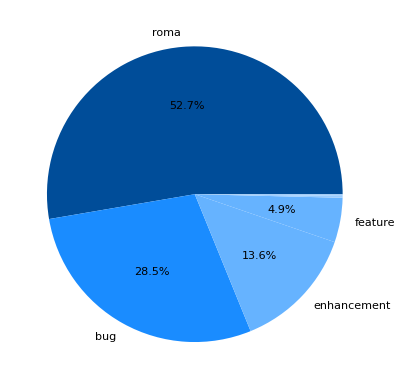

In [42]:
plt_pieChart(df_result, 'mapLabel', 'countofissues')

Review of Round 1

In [43]:
r = repolist['repository_name'].unique()

0. facebook/react-native

In [44]:
remaining_label_details(r[0])

      mapLabel  countofissues
0         roma          20423
1          bug           3103
2  enhancement             61


,repository_name,label,count,percentage
0,facebook/react-native,Resolution: Locked,16043,0.785536
1,facebook/react-native,Ran Commands,4507,0.220683
2,facebook/react-native,Stale,2896,0.141801
3,facebook/react-native,Needs: Triage :mag:,2684,0.13142
4,facebook/react-native,Platform: Android,1764,0.086373
5,facebook/react-native,Platform: iOS,1487,0.07281
6,facebook/react-native,Type: Question,823,0.040298
7,facebook/react-native,Needs: Author Feedback,821,0.0402
8,facebook/react-native,Resolution: For Stack Overflow,513,0.025119
9,facebook/react-native,Needs: Repro,482,0.023601


In [45]:
filtered_df[(filtered_df['labels_name'] == "['Resolution: Locked']") & ((filtered_df['repository_name'] == 'facebook/react-native') & (filtered_df['mapLabel'] == 'roma'))].shape[0]

8769

In [46]:
filtered_df[(filtered_df['labels_name'] == "['Resolution: Locked']") & (filtered_df['repository_name'] == 'facebook/react-native')].shape[0]

8769

1. spring-projects/spring-boot

In [47]:
remaining_label_details(r[1])

      mapLabel  countofissues
0         roma          21690
1          bug           3407
2  enhancement           3298


,repository_name,label,count,percentage
0,spring-projects/spring-boot,type: dependency-upgrade,6501,0.299723
1,spring-projects/spring-boot,type: task,4060,0.187183
2,spring-projects/spring-boot,status: invalid,3626,0.167174
3,spring-projects/spring-boot,status: forward-port,2606,0.120148
4,spring-projects/spring-boot,type: documentation,2075,0.095666
5,spring-projects/spring-boot,status: duplicate,1519,0.070032
6,spring-projects/spring-boot,for: stackoverflow,1516,0.069894
7,spring-projects/spring-boot,status: declined,1351,0.062287
8,spring-projects/spring-boot,for: external-project,1259,0.058045
9,spring-projects/spring-boot,status: superseded,1022,0.047118


2. elastic/elasticsearch

In [48]:
remaining_label_details(r[2])

      mapLabel  countofissues
0         roma          11511
1          bug           5930
2  enhancement           4266
3      feature            838


,repository_name,label,count,percentage
0,elastic/elasticsearch,>test-failure,4791,0.416211
1,elastic/elasticsearch,>docs,1332,0.115715
2,elastic/elasticsearch,Team:Delivery,1216,0.105638
3,elastic/elasticsearch,Team:Distributed,829,0.072018
4,elastic/elasticsearch,feedback_needed,820,0.071236
5,elastic/elasticsearch,discuss,815,0.070802
6,elastic/elasticsearch,:Search/Search,787,0.068369
7,elastic/elasticsearch,:Delivery/Build,784,0.068109
8,elastic/elasticsearch,>test,667,0.057945
9,elastic/elasticsearch,:Distributed/Snapshot/Restore,614,0.05334


3. spring-projects/spring-framework

In [49]:
remaining_label_details(r[3])

      mapLabel  countofissues
0         roma           9144
1  enhancement           8974
2          bug           4710


,repository_name,label,count,percentage
0,spring-projects/spring-framework,in: core,2593,0.283574
1,spring-projects/spring-framework,in: web,2287,0.250109
2,spring-projects/spring-framework,status: invalid,1723,0.18843
3,spring-projects/spring-framework,status: declined,1714,0.187445
4,spring-projects/spring-framework,type: task,1617,0.176837
5,spring-projects/spring-framework,type: documentation,983,0.107502
6,spring-projects/spring-framework,status: bulk-closed,767,0.08388
7,spring-projects/spring-framework,status: duplicate,764,0.083552
8,spring-projects/spring-framework,in: data,596,0.065179
9,spring-projects/spring-framework,type: regression,412,0.045057


4. ReactiveX/RxJava

In [50]:
remaining_label_details(r[4])

      mapLabel  countofissues
0         roma           1843
1          bug            266
2  enhancement            202
3      feature            124


,repository_name,label,count,percentage
0,ReactiveX/RxJava,Question,1102,0.597938
1,ReactiveX/RxJava,2.x,659,0.357569
2,ReactiveX/RxJava,Documentation,174,0.094411
3,ReactiveX/RxJava,3.x,172,0.093326
4,ReactiveX/RxJava,Information,134,0.072708
5,ReactiveX/RxJava,Discussion,133,0.072165
6,ReactiveX/RxJava,1.x,126,0.068367
7,ReactiveX/RxJava,PR welcome,115,0.062398
8,ReactiveX/RxJava,Android,76,0.041237
9,ReactiveX/RxJava,StackOverflow,72,0.039067


5. apache/dubbo

In [51]:
remaining_label_details(r[5])

      mapLabel  countofissues
0         roma           1065
1          bug            631
2     proposal            110
3      feature             94
4  enhancement             16


,repository_name,label,count,percentage
0,apache/dubbo,type/question,531,0.498592
1,apache/dubbo,help wanted,231,0.216901
2,apache/dubbo,good first issue,117,0.109859
3,apache/dubbo,status/waiting-for-feedback,99,0.092958
4,apache/dubbo,type/discussion,90,0.084507
5,apache/dubbo,type/suspicious,57,0.053521
6,apache/dubbo,status/need-triage,39,0.03662
7,apache/dubbo,level/easy,27,0.025352
8,apache/dubbo,type/refactor,23,0.021596
9,apache/dubbo,version/3.x,22,0.020657


6. dbeaver/dbeaver

In [52]:
remaining_label_details(r[6])

      mapLabel  countofissues
0          bug           7105
1      feature           2020
2         roma           1593
3  enhancement           1018


,repository_name,label,count,percentage
0,dbeaver/dbeaver,question,786,0.493409
1,dbeaver/dbeaver,wait for response,308,0.193346
2,dbeaver/dbeaver,can't reproduce,218,0.136849
3,dbeaver/dbeaver,duplicate,104,0.065286
4,dbeaver/dbeaver,x:postgresql,75,0.047081
5,dbeaver/dbeaver,won't do,67,0.042059
6,dbeaver/dbeaver,x:oracle,64,0.040176
7,dbeaver/dbeaver,x:mssql,55,0.034526
8,dbeaver/dbeaver,xf:sql,49,0.03076
9,dbeaver/dbeaver,x:mysql,48,0.030132


7. halo-dev/halo - CHECK LANGUAGE

In [53]:
remaining_label_details(r[7])

      mapLabel  countofissues
0         roma            911
1          bug            532
2      feature            489
3  improvement            296


,repository_name,label,count,percentage
0,halo-dev/halo,kind/support,463,0.508233
1,halo-dev/halo,help wanted,171,0.187706
2,halo-dev/halo,triage/duplicate,144,0.158068
3,halo-dev/halo,triage/needs-information,117,0.12843
4,halo-dev/halo,area/console,57,0.062569
5,halo-dev/halo,triage/unresolved,13,0.01427
6,halo-dev/halo,resolved,11,0.012075
7,halo-dev/halo,area/core,11,0.012075
8,halo-dev/halo,vulnerability,9,0.009879
9,halo-dev/halo,good first issue,8,0.008782


8. SeleniumHQ/selenium

In [54]:
remaining_label_details(r[8])

      mapLabel  countofissues
0         roma           3144
1          bug           1146
2  enhancement            325


,repository_name,label,count,percentage
0,SeleniumHQ/selenium,R-awaiting answer,846,0.269084
1,SeleniumHQ/selenium,C-java,400,0.127226
2,SeleniumHQ/selenium,D-IE,321,0.102099
3,SeleniumHQ/selenium,C-grid,295,0.09383
4,SeleniumHQ/selenium,C-py,294,0.093511
5,SeleniumHQ/selenium,D-firefox,292,0.092875
6,SeleniumHQ/selenium,C-nodejs,272,0.086514
7,SeleniumHQ/selenium,C-dotnet,248,0.07888
8,SeleniumHQ/selenium,needs-triaging,230,0.073155
9,SeleniumHQ/selenium,C-rb,146,0.046438


9. alibaba/nacos

In [55]:
remaining_label_details(r[9])

      mapLabel  countofissues
0         roma           4602
1          bug            461
2  enhancement            231
3      feature            116
4     proposal              7


,repository_name,label,count,percentage
0,alibaba/nacos,status/invalid,1636,0.355498
1,alibaba/nacos,expired,651,0.14146
2,alibaba/nacos,kind/question,628,0.136462
3,alibaba/nacos,status/need feedback,449,0.097566
4,alibaba/nacos,status/duplicate,425,0.092351
5,alibaba/nacos,area/Spring Cloud,190,0.041286
6,alibaba/nacos,contribution welcome,184,0.039983
7,alibaba/nacos,area/Config,181,0.039331
8,alibaba/nacos,kind/discussion,101,0.021947
9,alibaba/nacos,status/wontfix,101,0.021947


10. TeamNewPipe/NewPipe

In [56]:
remaining_label_details(r[10])

  mapLabel  countofissues
0     roma           1983
1      bug           1941
2  feature           1291


,repository_name,label,count,percentage
0,TeamNewPipe/NewPipe,duplicate,1176,0.593041
1,TeamNewPipe/NewPipe,template ignored,1129,0.569339
2,TeamNewPipe/NewPipe,question,310,0.156329
3,TeamNewPipe/NewPipe,template missing,212,0.106909
4,TeamNewPipe/NewPipe,meta,70,0.0353
5,TeamNewPipe/NewPipe,discussion,31,0.015633
6,TeamNewPipe/NewPipe,waiting for author,23,0.011599
7,TeamNewPipe/NewPipe,localisation / translation,22,0.011094
8,TeamNewPipe/NewPipe,wontfix,22,0.011094
9,TeamNewPipe/NewPipe,device/software specific,17,0.008573


11. apache/skywalking

In [57]:
remaining_label_details(r[11])

      mapLabel  countofissues
0         roma           2565
1          bug            996
2      feature            760
3  enhancement            102


,repository_name,label,count,percentage
0,apache/skywalking,question,1847,0.720078
1,apache/skywalking,agent,155,0.060429
2,apache/skywalking,invalid,121,0.047173
3,apache/skywalking,backend,120,0.046784
4,apache/skywalking,wontfix,96,0.037427
5,apache/skywalking,duplicate,86,0.033528
6,apache/skywalking,documentation,85,0.033138
7,apache/skywalking,plugin,71,0.02768
8,apache/skywalking,core feature,69,0.026901
9,apache/skywalking,discussion,62,0.024172


12. bazelbuild/bazel

In [58]:
remaining_label_details(r[12])

  mapLabel  countofissues
0     roma           3308
1      bug           3262
2  feature           1923


,repository_name,label,count,percentage
0,bazelbuild/bazel,P1,660,0.199516
1,bazelbuild/bazel,untriaged,595,0.179867
2,bazelbuild/bazel,P2,590,0.178356
3,bazelbuild/bazel,team-OSS,573,0.173216
4,bazelbuild/bazel,type: documentation (cleanup),568,0.171705
5,bazelbuild/bazel,type: process,378,0.114268
6,bazelbuild/bazel,under investigation,336,0.101572
7,bazelbuild/bazel,P3,325,0.098247
8,bazelbuild/bazel,type: support / not a bug (process),297,0.089782
9,bazelbuild/bazel,team-Rules-CPP,262,0.079202


13. Anuken/Mindustry

In [59]:
remaining_label_details(r[13])

  mapLabel  countofissues
0      bug           2810
1     roma             18


,repository_name,label,count,percentage
0,Anuken/Mindustry,help wanted,8,0.444444
1,Anuken/Mindustry,a disgrace,8,0.444444
2,Anuken/Mindustry,draft,2,0.111111


14. apache/shardingsphere

In [60]:
remaining_label_details(r[14])

      mapLabel  countofissues
0         roma           6569
1  enhancement           1196
2          bug           1086
3      feature            104


,repository_name,label,count,percentage
0,apache/shardingsphere,status: invalid,2049,0.31192
1,apache/shardingsphere,type: question,1357,0.206576
2,apache/shardingsphere,in: test,723,0.110062
3,apache/shardingsphere,good first issue,581,0.088446
4,apache/shardingsphere,type: duplicate,519,0.079007
5,apache/shardingsphere,type: refactor,458,0.069721
6,apache/shardingsphere,in: SQL parse,266,0.040493
7,apache/shardingsphere,feature: sharding,238,0.036231
8,apache/shardingsphere,in: document,229,0.034861
9,apache/shardingsphere,in: proxy,185,0.028163


15. OpenAPITools/openapi-generator

In [61]:
remaining_label_details(r[15])

      mapLabel  countofissues
0          bug           2110
1  enhancement            646
2         roma            202
3      feature             23
4   suggestion              8


,repository_name,label,count,percentage
0,OpenAPITools/openapi-generator,Client: Python,32,0.158416
1,OpenAPITools/openapi-generator,General: Question,22,0.108911
2,OpenAPITools/openapi-generator,Announcement,21,0.10396
3,OpenAPITools/openapi-generator,Client: TypeScript,17,0.084158
4,OpenAPITools/openapi-generator,Client: Java,12,0.059406
5,OpenAPITools/openapi-generator,General: Discussion,12,0.059406
6,OpenAPITools/openapi-generator,Issue: Invalid spec,9,0.044554
7,OpenAPITools/openapi-generator,Server: C++,9,0.044554
8,OpenAPITools/openapi-generator,Swagger-Parser,8,0.039604
9,OpenAPITools/openapi-generator,Client: Rust,6,0.029703


16. openzipkin/zipkin

In [62]:
remaining_label_details(r[16])

      mapLabel  countofissues
0         roma            303
1  enhancement            178
2          bug            156


,repository_name,label,count,percentage
0,openzipkin/zipkin,question,156,0.514851
1,openzipkin/zipkin,ui,67,0.221122
2,openzipkin/zipkin,elasticsearch,27,0.089109
3,openzipkin/zipkin,releng,19,0.062706
4,openzipkin/zipkin,docs,16,0.052805
5,openzipkin/zipkin,help wanted,16,0.052805
6,openzipkin/zipkin,cassandra,15,0.049505
7,openzipkin/zipkin,duplicate,14,0.046205
8,openzipkin/zipkin,chore,13,0.042904
9,openzipkin/zipkin,feedback-needed,10,0.033003


17. thingsboard/thingsboard

In [63]:
remaining_label_details(r[17])

      mapLabel  countofissues
0         roma           1107
1          bug            644
2      feature            193
3  enhancement              8


,repository_name,label,count,percentage
0,thingsboard/thingsboard,Question,1098,0.99187
1,thingsboard/thingsboard,Contributions Welcome!,5,0.004517
2,thingsboard/thingsboard,UI,2,0.001807
3,thingsboard/thingsboard,invalid,1,0.000903
4,thingsboard/thingsboard,Docs enhancement,1,0.000903


18. mockito/mockito

In [64]:
remaining_label_details(r[18])

      mapLabel  countofissues
0         roma            342
1  enhancement             69
2          bug             66
3      feature             18


,repository_name,label,count,percentage
0,mockito/mockito,please contribute,72,0.210526
1,mockito/mockito,continuous integration,57,0.166667
2,mockito/mockito,android,39,0.114035
3,mockito/mockito,docs,38,0.111111
4,mockito/mockito,question,34,0.099415
5,mockito/mockito,wontfix,17,0.049708
6,mockito/mockito,java-9,17,0.049708
7,mockito/mockito,invalid,15,0.04386
8,mockito/mockito,awaiting response,15,0.04386
9,mockito/mockito,refactoring,13,0.038012


19. elastic/logstash

In [65]:
remaining_label_details(r[19])

      mapLabel  countofissues
0         roma           1304
1          bug            993
2  enhancement            509


,repository_name,label,count,percentage
0,elastic/logstash,docs,306,0.234663
1,elastic/logstash,test failure,183,0.140337
2,elastic/logstash,meta,94,0.072086
3,elastic/logstash,discuss,89,0.068252
4,elastic/logstash,blocker,87,0.066718
5,elastic/logstash,v1.5.0,66,0.050613
6,elastic/logstash,monitoring,65,0.049847
7,elastic/logstash,v5.0.0,61,0.046779
8,elastic/logstash,tests-infra,57,0.043712
9,elastic/logstash,new plugin,50,0.038344


20. apache/pulsar

In [66]:
remaining_label_details(r[20])

      mapLabel  countofissues
0          bug           2805
1         roma           1284
2      feature            715
3  enhancement            419


,repository_name,label,count,percentage
0,apache/pulsar,component/test,296,0.23053
1,apache/pulsar,flaky-tests,284,0.221184
2,apache/pulsar,doc-required,263,0.204829
3,apache/pulsar,lifecycle/stale,256,0.199377
4,apache/pulsar,question,214,0.166667
5,apache/pulsar,Stale,183,0.142523
6,apache/pulsar,doc,125,0.097352
7,apache/pulsar,PIP,116,0.090343
8,apache/pulsar,help wanted,88,0.068536
9,apache/pulsar,doc-complete,26,0.020249


21. GoogleContainerTools/jib

In [67]:
remaining_label_details(r[21])

      mapLabel  countofissues
0         roma            631
1  enhancement             70
2          bug             32


,repository_name,label,count,percentage
0,GoogleContainerTools/jib,question,112,0.177496
1,GoogleContainerTools/jib,area/jib-gradle-plugin,111,0.175911
2,GoogleContainerTools/jib,area/jib-maven-plugin,108,0.171157
3,GoogleContainerTools/jib,area/jib-core,96,0.152139
4,GoogleContainerTools/jib,priority:p3,91,0.144216
5,GoogleContainerTools/jib,priority: p2,90,0.142631
6,GoogleContainerTools/jib,priority: p1,68,0.107765
7,GoogleContainerTools/jib,type:documentation,65,0.103011
8,GoogleContainerTools/jib,priority :p0,58,0.091918
9,GoogleContainerTools/jib,release,51,0.080824


22. pinpoint-apm/pinpoint

In [68]:
remaining_label_details(r[22])

      mapLabel  countofissues
0         roma           1499
1  enhancement            725
2          bug            356
3     proposal             29


,repository_name,label,count,percentage
0,pinpoint-apm/pinpoint,stale,560,0.373582
1,pinpoint-apm/pinpoint,question,468,0.312208
2,pinpoint-apm/pinpoint,help wanted,193,0.128753
3,pinpoint-apm/pinpoint,dependencies,112,0.074716
4,pinpoint-apm/pinpoint,module:web,87,0.058039
5,pinpoint-apm/pinpoint,cleanup,62,0.041361
6,pinpoint-apm/pinpoint,release,58,0.038692
7,pinpoint-apm/pinpoint,module:agent,57,0.038025
8,pinpoint-apm/pinpoint,module:collector,51,0.034023
9,pinpoint-apm/pinpoint,module:plugin,46,0.030687


23. apache/druid

In [69]:
remaining_label_details(r[23])

      mapLabel  countofissues
0         roma           1695
1          bug            585
2      feature            305
3  improvement            114
4     proposal             56


,repository_name,label,count,percentage
0,apache/druid,stale,1089,0.642478
1,apache/druid,Uncategorized problem report,338,0.19941
2,apache/druid,Area - Testing,81,0.047788
3,apache/druid,Area - Documentation,76,0.044838
4,apache/druid,Discuss,47,0.027729
5,apache/druid,Flaky test,46,0.027139
6,apache/druid,Release Notes,40,0.023599
7,apache/druid,Starter,38,0.022419
8,apache/druid,Performance,35,0.020649
9,apache/druid,Contributions Welcome,31,0.018289


24. questdb/questdb

In [70]:
remaining_label_details(r[24])

      mapLabel  countofissues
0          bug            333
1      feature            190
2         roma            139
3  enhancement             36


,repository_name,label,count,percentage
0,questdb/questdb,Schrödinger's bug,35,0.251799
1,questdb/questdb,Question,28,0.201439
2,questdb/questdb,SQL,20,0.143885
3,questdb/questdb,Documentation,18,0.129496
4,questdb/questdb,Performance,12,0.086331
5,questdb/questdb,Postgres Wire,12,0.086331
6,questdb/questdb,UI,6,0.043165
7,questdb/questdb,ILP,5,0.035971
8,questdb/questdb,REST API,4,0.028777
9,questdb/questdb,Compatibility,4,0.028777


25. quarkusio/quarkus

In [71]:
remaining_label_details(r[25])

      mapLabel  countofissues
0          bug           7420
1  enhancement           2755
2         roma           1923
3     proposal            143
4      feature             28


,repository_name,label,count,percentage
0,quarkusio/quarkus,kind/question,580,0.301612
1,quarkusio/quarkus,area/housekeeping,278,0.144566
2,quarkusio/quarkus,triage/invalid,190,0.098804
3,quarkusio/quarkus,triage/out-of-date,175,0.091004
4,quarkusio/quarkus,area/documentation,125,0.065003
5,quarkusio/quarkus,area/smallrye,106,0.055122
6,quarkusio/quarkus,kind/epic,105,0.054602
7,quarkusio/quarkus,area/persistence,77,0.040042
8,quarkusio/quarkus,area/arc,69,0.035881
9,quarkusio/quarkus,area/gradle,65,0.033801


26. codecentric/spring-boot-admin

In [72]:
remaining_label_details(r[26])

      mapLabel  countofissues
0         roma            461
1          bug            337
2  enhancement            303


,repository_name,label,count,percentage
0,codecentric/spring-boot-admin,waiting-for-feedback,181,0.392625
1,codecentric/spring-boot-admin,invalid,86,0.186551
2,codecentric/spring-boot-admin,duplicate,71,0.154013
3,codecentric/spring-boot-admin,help wanted,50,0.10846
4,codecentric/spring-boot-admin,wontfix,32,0.069414
5,codecentric/spring-boot-admin,documentation,11,0.023861
6,codecentric/spring-boot-admin,discussion,10,0.021692
7,codecentric/spring-boot-admin,server,7,0.015184
8,codecentric/spring-boot-admin,for-external-project,7,0.015184
9,codecentric/spring-boot-admin,client,6,0.013015


27. neo4j/neo4j

In [73]:
remaining_label_details(r[27])

      mapLabel  countofissues
0          bug           1196
1         roma            520
2      feature            361
3  enhancement             57


,repository_name,label,count,percentage
0,neo4j/neo4j,team-cypher,134,0.257692
1,neo4j/neo4j,team-kernel,125,0.240385
2,neo4j/neo4j,question,95,0.182692
3,neo4j/neo4j,cypher,87,0.167308
4,neo4j/neo4j,team-drivers,51,0.098077
5,neo4j/neo4j,operability,37,0.071154
6,neo4j/neo4j,docs,21,0.040385
7,neo4j/neo4j,browser,21,0.040385
8,neo4j/neo4j,2.2,17,0.032692
9,neo4j/neo4j,2.3,16,0.030769


28. redis/jedis

In [74]:
remaining_label_details(r[28])

      mapLabel  countofissues
0  enhancement             69
1         roma             53
2          bug             32
3      feature             26


,repository_name,label,count,percentage
0,redis/jedis,question,22,0.415094
1,redis/jedis,could not reproduce,13,0.245283
2,redis/jedis,will not fix,7,0.132075
3,redis/jedis,documentation,4,0.075472
4,redis/jedis,maintenance,4,0.075472
5,redis/jedis,testing,2,0.037736
6,redis/jedis,experimental,1,0.018868


29. zaproxy/zaproxy

In [75]:
remaining_label_details(r[29])

      mapLabel  countofissues
0          bug           1486
1         roma           1312
2  enhancement           1117


,repository_name,label,count,percentage
0,zaproxy/zaproxy,historic,648,0.493902
1,zaproxy/zaproxy,question,340,0.259146
2,zaproxy/zaproxy,add-on,277,0.211128
3,zaproxy/zaproxy,invalid,172,0.131098
4,zaproxy/zaproxy,Type-Task,134,0.102134
5,zaproxy/zaproxy,duplicate,121,0.092226
6,zaproxy/zaproxy,InsufficientEvidence,108,0.082317
7,zaproxy/zaproxy,Priority-Medium,84,0.064024
8,zaproxy/zaproxy,FalsePositive,76,0.057927
9,zaproxy/zaproxy,Docker,74,0.056402


30. grpc/grpc-java

In [76]:
remaining_label_details(r[30])

      mapLabel  countofissues
0         roma            927
1          bug            300
2  enhancement            225
3      feature              4


,repository_name,label,count,percentage
0,grpc/grpc-java,question,514,0.554477
1,grpc/grpc-java,code health,117,0.126214
2,grpc/grpc-java,experimental API,63,0.067961
3,grpc/grpc-java,api-breaking,56,0.06041
4,grpc/grpc-java,docs,48,0.05178
5,grpc/grpc-java,okhttp,38,0.040992
6,grpc/grpc-java,netty,28,0.030205
7,grpc/grpc-java,usability,22,0.023732
8,grpc/grpc-java,performance,19,0.020496
9,grpc/grpc-java,P1,16,0.01726


31. Netflix/conductor

In [77]:
remaining_label_details(r[31])

      mapLabel  countofissues
0         roma            298
1          bug            160
2  enhancement             35
3      feature             20


,repository_name,label,count,percentage
0,Netflix/conductor,Stale,203,0.681208
1,Netflix/conductor,question,51,0.171141
2,Netflix/conductor,type: docs,37,0.124161
3,Netflix/conductor,help_wanted,27,0.090604
4,Netflix/conductor,invalid,2,0.006711
5,Netflix/conductor,UI,2,0.006711
6,Netflix/conductor,duplicate,1,0.003356
7,Netflix/conductor,conductor-3.0,1,0.003356
8,Netflix/conductor,good first issue,1,0.003356


Round 2 - Confidence = 100%

In [78]:
label_mapping_df_2 = pd.read_excel("/Users/isdeniz/Documents/github/label_mapping_round2.xlsx")
label_mapping_df_2.head()

,rule,src_project,src_project_label,mapLabel,confidence,defined_label_description,notes
0,0,spring-projects/spring-boot,type: documentation,documentation,1,A documentation update,NaN
1,1,spring-projects/spring-framework,type: documentation,documentation,1,A documentation task,NaN
2,2,elastic/elasticsearch,>docs,documentation,1,General docs changes,NaN
3,3,ReactiveX/RxJava,Documentation,documentation,1,NaN,NaN
4,4,apache/skywalking,documentation,documentation,1,Provide documents related issue or pull reques...,NaN


In [79]:
i = 0
while i < label_mapping_df_2.shape[0]:
    filtered_df.loc[filtered_df['mapLabel'] == 'roma', 'mapLabel'] = filtered_df.loc[filtered_df['mapLabel'] == 'roma'].apply(lambda row: label_mapping(row['repository_name'], row['labels_name'], i, label_mapping_df_2), axis = 1)
    i = i + 1 

In [80]:
remaining_label_details_total()

         mapLabel  countofissues          %
0             bug          56397  28.471686
1    out-of-scope          54490  27.508948
2            roma          28253  14.263357
3     enhancement          26910  13.585351
4         feature           9642   4.867706
5            test           6671   3.367814
6   documentation           6623   3.343582
7       duplicate           4900   2.473735
8         wontfix           3432   1.732625
9     improvement            410   0.206986
10       proposal            345   0.174171
11     suggestion              8   0.004039
198081


In [81]:
df_result = remaining_label_details_total_df()
df_result

,mapLabel,countofissues,%
0,bug,56397,28.471686
1,out-of-scope,54490,27.508948
2,roma,28253,14.263357
3,enhancement,26910,13.585351
4,feature,9642,4.867706
5,test,6671,3.367814
6,documentation,6623,3.343582
7,duplicate,4900,2.473735
8,wontfix,3432,1.732625
9,improvement,410,0.206986


<Figure size 800x600 with 0 Axes>

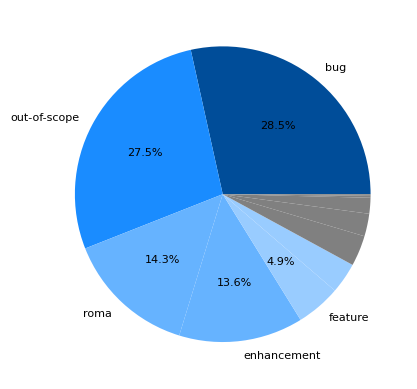

In [82]:
plt_pieChart(df_result,'mapLabel','countofissues')

Review of Round 2

0. facebook/react-native	

In [83]:
remaining_label_details(r[0])

       mapLabel  countofissues
0  out-of-scope          19010
1           bug           3103
2          roma           1413
3   enhancement             61


,repository_name,label,count,percentage
0,facebook/react-native,Needs: Triage :mag:,570,0.403397
1,facebook/react-native,Platform: Android,319,0.225761
2,facebook/react-native,Platform: iOS,226,0.159943
3,facebook/react-native,Resolution: Answered,202,0.142958
4,facebook/react-native,Needs: Repro,169,0.119604
5,facebook/react-native,Type: New Architecture,138,0.097665
6,facebook/react-native,Needs: Author Feedback,132,0.093418
7,facebook/react-native,Type: Upgrade Issue,126,0.089172
8,facebook/react-native,Newer Patch Available,113,0.079972
9,facebook/react-native,Resolution: Issue in another tool or repo,107,0.075725


1. spring-projects/spring-boot

In [84]:
remaining_label_details(r[1])

        mapLabel  countofissues
0   out-of-scope          16112
1            bug           3407
2    enhancement           3298
3  documentation           2075
4      duplicate           1503
5        wontfix           1338
6           roma            662


,repository_name,label,count,percentage
0,spring-projects/spring-boot,type: regression,409,0.617825
1,spring-projects/spring-boot,status: forward-port,145,0.219033
2,spring-projects/spring-boot,type: blocker,123,0.185801
3,spring-projects/spring-boot,type: wiki-documentation,88,0.132931
4,spring-projects/spring-boot,status: feedback-provided,31,0.046828
5,spring-projects/spring-boot,theme: config-data,6,0.009063
6,spring-projects/spring-boot,type: epic,4,0.006042
7,spring-projects/spring-boot,status: on-hold,3,0.004532
8,spring-projects/spring-boot,theme: aot,3,0.004532
9,spring-projects/spring-boot,theme: performance,2,0.003021


2. elastic/elasticsearch

In [85]:
remaining_label_details(r[2])

        mapLabel  countofissues
0            bug           5930
1           test           5266
2    enhancement           4266
3           roma           4131
4  documentation           1332
5        feature            838
6   out-of-scope            782


,repository_name,label,count,percentage
0,elastic/elasticsearch,feedback_needed,759,0.183733
1,elastic/elasticsearch,Team:Delivery,587,0.142096
2,elastic/elasticsearch,:Delivery/Build,372,0.090051
3,elastic/elasticsearch,:Search/Search,321,0.077705
4,elastic/elasticsearch,:Delivery/Packaging,220,0.053256
5,elastic/elasticsearch,>non-issue,219,0.053014
6,elastic/elasticsearch,:Core/Infra/Core,210,0.050835
7,elastic/elasticsearch,help wanted,208,0.050351
8,elastic/elasticsearch,:Analytics/Aggregations,192,0.046478
9,elastic/elasticsearch,>breaking,187,0.045267


3. spring-projects/spring-framework

In [86]:
remaining_label_details(r[3])

        mapLabel  countofissues
0    enhancement           8974
1            bug           4710
2   out-of-scope           3049
3           roma           2727
4        wontfix           1647
5  documentation            983
6      duplicate            738


,repository_name,label,count,percentage
0,spring-projects/spring-framework,in: core,1021,0.374404
1,spring-projects/spring-framework,status: bulk-closed,765,0.280528
2,spring-projects/spring-framework,in: web,701,0.257059
3,spring-projects/spring-framework,type: regression,398,0.145948
4,spring-projects/spring-framework,for: stackoverflow,225,0.082508
5,spring-projects/spring-framework,in: data,212,0.077741
6,spring-projects/spring-framework,type: dependency-upgrade,207,0.075908
7,spring-projects/spring-framework,for: external-project,175,0.064173
8,spring-projects/spring-framework,status: superseded,141,0.051705
9,spring-projects/spring-framework,in: test,99,0.036304


4. ReactiveX/RxJava

In [87]:
remaining_label_details(r[4])

        mapLabel  countofissues
0   out-of-scope           1377
1           roma            292
2            bug            266
3    enhancement            202
4  documentation            174
5        feature            124


,repository_name,label,count,percentage
0,ReactiveX/RxJava,2.x,89,0.304795
1,ReactiveX/RxJava,Test-Failures,54,0.184932
2,ReactiveX/RxJava,PR welcome,51,0.174658
3,ReactiveX/RxJava,3.x,49,0.167808
4,ReactiveX/RxJava,Invalid,45,0.15411
5,ReactiveX/RxJava,Shortcoming,27,0.092466
6,ReactiveX/RxJava,Cleanup,24,0.082192
7,ReactiveX/RxJava,Build,22,0.075342
8,ReactiveX/RxJava,Android,21,0.071918
9,ReactiveX/RxJava,1.x,20,0.068493


5. apache/dubbo

In [88]:
remaining_label_details(r[5])

       mapLabel  countofissues
0           bug            631
1  out-of-scope            621
2          roma            444
3      proposal            110
4       feature             94
5   enhancement             16


,repository_name,label,count,percentage
0,apache/dubbo,help wanted,213,0.47973
1,apache/dubbo,good first issue,113,0.254505
2,apache/dubbo,status/waiting-for-feedback,62,0.13964
3,apache/dubbo,type/suspicious,57,0.128378
4,apache/dubbo,status/need-triage,34,0.076577
5,apache/dubbo,level/easy,26,0.058559
6,apache/dubbo,type/refactor,23,0.051802
7,apache/dubbo,version/2.7.x,14,0.031532
8,apache/dubbo,version/3.x,14,0.031532
9,apache/dubbo,type/unit-test,12,0.027027


6. dbeaver/dbeaver

In [89]:
remaining_label_details(r[6])

       mapLabel  countofissues
0           bug           7105
1       feature           2020
2   enhancement           1018
3  out-of-scope            761
4          roma            729
5     duplicate            103


,repository_name,label,count,percentage
0,dbeaver/dbeaver,can't reproduce,218,0.29904
1,dbeaver/dbeaver,wait for response,132,0.18107
2,dbeaver/dbeaver,won't do,67,0.091907
3,dbeaver/dbeaver,x:postgresql,53,0.072702
4,dbeaver/dbeaver,wiki,41,0.056241
5,dbeaver/dbeaver,x:oracle,40,0.05487
6,dbeaver/dbeaver,x:mssql,36,0.049383
7,dbeaver/dbeaver,x:db2,30,0.041152
8,dbeaver/dbeaver,other,28,0.038409
9,dbeaver/dbeaver,sp:1,28,0.038409


7. halo-dev/halo

In [90]:
remaining_label_details(r[7])

      mapLabel  countofissues
0         roma            754
1          bug            532
2      feature            489
3  improvement            296
4    duplicate            144
5      wontfix             13


,repository_name,label,count,percentage
0,halo-dev/halo,kind/support,442,0.586207
1,halo-dev/halo,help wanted,167,0.221485
2,halo-dev/halo,triage/needs-information,114,0.151194
3,halo-dev/halo,area/console,53,0.070292
4,halo-dev/halo,resolved,11,0.014589
5,halo-dev/halo,area/core,10,0.013263
6,halo-dev/halo,good first issue,8,0.01061
7,halo-dev/halo,area/plugin,7,0.009284
8,halo-dev/halo,needs more info,6,0.007958
9,halo-dev/halo,vulnerability,6,0.007958


8. SeleniumHQ/selenium

In [91]:
remaining_label_details(r[8])

      mapLabel  countofissues
0         roma           3144
1          bug           1146
2  enhancement            325


,repository_name,label,count,percentage
0,SeleniumHQ/selenium,R-awaiting answer,846,0.269084
1,SeleniumHQ/selenium,C-java,400,0.127226
2,SeleniumHQ/selenium,D-IE,321,0.102099
3,SeleniumHQ/selenium,C-grid,295,0.09383
4,SeleniumHQ/selenium,C-py,294,0.093511
5,SeleniumHQ/selenium,D-firefox,292,0.092875
6,SeleniumHQ/selenium,C-nodejs,272,0.086514
7,SeleniumHQ/selenium,C-dotnet,248,0.07888
8,SeleniumHQ/selenium,needs-triaging,230,0.073155
9,SeleniumHQ/selenium,C-rb,146,0.046438


9. alibaba/nacos

In [92]:
remaining_label_details(r[9])

       mapLabel  countofissues
0  out-of-scope           2336
1          roma           1741
2           bug            461
3     duplicate            425
4   enhancement            231
5       feature            116
6       wontfix            100
7      proposal              7


,repository_name,label,count,percentage
0,alibaba/nacos,expired,555,0.318782
1,alibaba/nacos,status/need feedback,384,0.220563
2,alibaba/nacos,contribution welcome,159,0.091327
3,alibaba/nacos,area/Config,131,0.075244
4,alibaba/nacos,kind/code quality,87,0.049971
5,alibaba/nacos,area/Nacos console,81,0.046525
6,alibaba/nacos,kind/refactor,77,0.044227
7,alibaba/nacos,area/Test,77,0.044227
8,alibaba/nacos,kind/research,76,0.043653
9,alibaba/nacos,status/need discuss,69,0.039632


10. TeamNewPipe/NewPipe

In [93]:
remaining_label_details(r[10])

       mapLabel  countofissues
0           bug           1941
1       feature           1291
2     duplicate           1176
3          roma            454
4  out-of-scope            331
5       wontfix             22


,repository_name,label,count,percentage
0,TeamNewPipe/NewPipe,template ignored,188,0.414097
1,TeamNewPipe/NewPipe,template missing,136,0.299559
2,TeamNewPipe/NewPipe,meta,58,0.127753
3,TeamNewPipe/NewPipe,localisation / translation,18,0.039648
4,TeamNewPipe/NewPipe,device/software specific,16,0.035242
5,TeamNewPipe/NewPipe,help wanted,13,0.028634
6,TeamNewPipe/NewPipe,waiting for author,13,0.028634
7,TeamNewPipe/NewPipe,good first issue,10,0.022026
8,TeamNewPipe/NewPipe,youtube,9,0.019824
9,TeamNewPipe/NewPipe,ASAP,7,0.015419


11. apache/skywalking

In [94]:
remaining_label_details(r[11])

        mapLabel  countofissues
0   out-of-scope           1959
1            bug            996
2        feature            760
3           roma            339
4    enhancement            102
5        wontfix             96
6      duplicate             86
7  documentation             85


,repository_name,label,count,percentage
0,apache/skywalking,agent,112,0.330383
1,apache/skywalking,backend,74,0.218289
2,apache/skywalking,core feature,60,0.176991
3,apache/skywalking,plugin,58,0.171091
4,apache/skywalking,good first issue,35,0.103245
5,apache/skywalking,test,34,0.100295
6,apache/skywalking,UI,33,0.097345
7,apache/skywalking,TBD,30,0.088496
8,apache/skywalking,python,20,0.058997
9,apache/skywalking,no update,19,0.056047


12. bazelbuild/bazel

In [95]:
remaining_label_details(r[12])

        mapLabel  countofissues
0            bug           3262
1           roma           2740
2        feature           1923
3  documentation            568


,repository_name,label,count,percentage
0,bazelbuild/bazel,P1,628,0.229197
1,bazelbuild/bazel,team-OSS,529,0.193066
2,bazelbuild/bazel,untriaged,523,0.190876
3,bazelbuild/bazel,P2,424,0.154745
4,bazelbuild/bazel,type: process,375,0.136861
5,bazelbuild/bazel,under investigation,328,0.119708
6,bazelbuild/bazel,type: support / not a bug (process),295,0.107664
7,bazelbuild/bazel,team-Rules-CPP,236,0.086131
8,bazelbuild/bazel,breakage,222,0.081022
9,bazelbuild/bazel,release,201,0.073358


13. Anuken/Mindustry

In [96]:
remaining_label_details(r[13])

  mapLabel  countofissues
0      bug           2810
1     roma             18


,repository_name,label,count,percentage
0,Anuken/Mindustry,help wanted,8,0.444444
1,Anuken/Mindustry,a disgrace,8,0.444444
2,Anuken/Mindustry,draft,2,0.111111


14. apache/shardingsphere

In [97]:
remaining_label_details(r[14])

        mapLabel  countofissues
0   out-of-scope           3360
1           roma           1743
2    enhancement           1196
3            bug           1086
4           test            719
5      duplicate            519
6  documentation            228
7        feature            104


,repository_name,label,count,percentage
0,apache/shardingsphere,type: refactor,425,0.243832
1,apache/shardingsphere,in: SQL parse,211,0.121056
2,apache/shardingsphere,status: won't fix,179,0.102697
3,apache/shardingsphere,feature: sharding,164,0.094091
4,apache/shardingsphere,in: proxy,122,0.069994
5,apache/shardingsphere,mode: cluster,119,0.068273
6,apache/shardingsphere,feature: DistSQL,113,0.064831
7,apache/shardingsphere,type: discussion,111,0.063683
8,apache/shardingsphere,good first issue,103,0.059094
9,apache/shardingsphere,type: build,93,0.053356


15. OpenAPITools/openapi-generator	

In [98]:
remaining_label_details(r[15])

       mapLabel  countofissues
0           bug           2110
1   enhancement            646
2          roma            148
3  out-of-scope             54
4       feature             23
5    suggestion              8


,repository_name,label,count,percentage
0,OpenAPITools/openapi-generator,Client: Python,29,0.195946
1,OpenAPITools/openapi-generator,Client: TypeScript,17,0.114865
2,OpenAPITools/openapi-generator,Client: Java,9,0.060811
3,OpenAPITools/openapi-generator,Issue: Invalid spec,9,0.060811
4,OpenAPITools/openapi-generator,Server: C++,9,0.060811
5,OpenAPITools/openapi-generator,Swagger-Parser,8,0.054054
6,OpenAPITools/openapi-generator,Server: Java,6,0.040541
7,OpenAPITools/openapi-generator,Issue: Usage/Installation,6,0.040541
8,OpenAPITools/openapi-generator,Server: Spring,6,0.040541
9,OpenAPITools/openapi-generator,Issue: Non-operational,5,0.033784


16. openzipkin/zipkin

In [99]:
remaining_label_details(r[16])

        mapLabel  countofissues
0    enhancement            178
1            bug            156
2   out-of-scope            155
3           roma            118
4  documentation             16
5      duplicate             14


,repository_name,label,count,percentage
0,openzipkin/zipkin,ui,42,0.355932
1,openzipkin/zipkin,releng,19,0.161017
2,openzipkin/zipkin,cassandra,15,0.127119
3,openzipkin/zipkin,help wanted,14,0.118644
4,openzipkin/zipkin,elasticsearch,14,0.118644
5,openzipkin/zipkin,chore,13,0.110169
6,openzipkin/zipkin,techdebt,10,0.084746
7,openzipkin/zipkin,feedback-needed,8,0.067797
8,openzipkin/zipkin,wontfix,4,0.033898
9,openzipkin/zipkin,server,4,0.033898


17. thingsboard/thingsboard

In [100]:
remaining_label_details(r[17])

        mapLabel  countofissues
0   out-of-scope           1099
1            bug            644
2        feature            193
3    enhancement              8
4           roma              7
5  documentation              1


,repository_name,label,count,percentage
0,thingsboard/thingsboard,Contributions Welcome!,5,0.714286
1,thingsboard/thingsboard,UI,2,0.285714


18. mockito/mockito

In [101]:
remaining_label_details(r[18])

        mapLabel  countofissues
0           roma            241
1    enhancement             69
2            bug             66
3   out-of-scope             46
4  documentation             38
5        feature             18
6        wontfix             17


,repository_name,label,count,percentage
0,mockito/mockito,please contribute,66,0.273859
1,mockito/mockito,continuous integration,52,0.215768
2,mockito/mockito,android,31,0.128631
3,mockito/mockito,java-9,16,0.06639
4,mockito/mockito,refactoring,12,0.049793
5,mockito/mockito,awaiting response,11,0.045643
6,mockito/mockito,java-11,9,0.037344
7,mockito/mockito,build,9,0.037344
8,mockito/mockito,junit5,7,0.029046
9,mockito/mockito,injection,7,0.029046


19. elastic/logstash

In [102]:
remaining_label_details(r[19])

        mapLabel  countofissues
0            bug            993
1           roma            680
2    enhancement            509
3  documentation            306
4           test            233
5   out-of-scope             85


,repository_name,label,count,percentage
0,elastic/logstash,blocker,75,0.110294
1,elastic/logstash,meta,55,0.080882
2,elastic/logstash,monitoring,49,0.072059
3,elastic/logstash,v1.5.0,47,0.069118
4,elastic/logstash,new plugin,45,0.066176
5,elastic/logstash,v5.0.0,41,0.060294
6,elastic/logstash,invalid,39,0.057353
7,elastic/logstash,packaging,37,0.054412
8,elastic/logstash,unconfirmed,33,0.048529
9,elastic/logstash,windows,32,0.047059


20. apache/pulsar

In [103]:
remaining_label_details(r[20])

        mapLabel  countofissues
0            bug           2805
1        feature            715
2    enhancement            419
3  documentation            412
4           test            354
5           roma            323
6   out-of-scope            195


,repository_name,label,count,percentage
0,apache/pulsar,lifecycle/stale,114,0.352941
1,apache/pulsar,PIP,112,0.346749
2,apache/pulsar,Stale,86,0.266254
3,apache/pulsar,help wanted,24,0.074303
4,apache/pulsar,component/build,21,0.065015
5,apache/pulsar,component/client,12,0.037152
6,apache/pulsar,component/function,9,0.027864
7,apache/pulsar,component/broker,9,0.027864
8,apache/pulsar,component/cli,5,0.01548
9,apache/pulsar,type/cleanup,5,0.01548


21. GoogleContainerTools/jib

In [104]:
remaining_label_details(r[21])

        mapLabel  countofissues
0           roma            457
1   out-of-scope            109
2    enhancement             70
3  documentation             65
4            bug             32


,repository_name,label,count,percentage
0,GoogleContainerTools/jib,area/jib-core,81,0.177243
1,GoogleContainerTools/jib,area/jib-maven-plugin,73,0.159737
2,GoogleContainerTools/jib,area/jib-gradle-plugin,72,0.157549
3,GoogleContainerTools/jib,priority: p2,70,0.153173
4,GoogleContainerTools/jib,priority: p1,54,0.118162
5,GoogleContainerTools/jib,release,51,0.111597
6,GoogleContainerTools/jib,priority :p0,50,0.109409
7,GoogleContainerTools/jib,priority:p3,46,0.100656
8,GoogleContainerTools/jib,cleanup,44,0.09628
9,GoogleContainerTools/jib,good first issue,28,0.061269


22. pinpoint-apm/pinpoint

In [105]:
remaining_label_details(r[22])

       mapLabel  countofissues
0          roma            919
1   enhancement            725
2  out-of-scope            580
3           bug            356
4      proposal             29


,repository_name,label,count,percentage
0,pinpoint-apm/pinpoint,stale,419,0.45593
1,pinpoint-apm/pinpoint,help wanted,191,0.207835
2,pinpoint-apm/pinpoint,module:web,76,0.082699
3,pinpoint-apm/pinpoint,cleanup,62,0.067465
4,pinpoint-apm/pinpoint,release,58,0.063112
5,pinpoint-apm/pinpoint,module:agent,43,0.04679
6,pinpoint-apm/pinpoint,module:plugin,42,0.045702
7,pinpoint-apm/pinpoint,module:collector,41,0.044614
8,pinpoint-apm/pinpoint,module:project-common,29,0.031556
9,pinpoint-apm/pinpoint,module:batch,17,0.018498


23. apache/druid

In [106]:
remaining_label_details(r[23])

        mapLabel  countofissues
0           roma           1477
1            bug            585
2        feature            305
3    improvement            114
4           test             97
5  documentation             76
6       proposal             56
7   out-of-scope             45


,repository_name,label,count,percentage
0,apache/druid,stale,1024,0.693297
1,apache/druid,Uncategorized problem report,337,0.228165
2,apache/druid,Release Notes,37,0.025051
3,apache/druid,Starter,36,0.024374
4,apache/druid,Performance,32,0.021666
5,apache/druid,Contributions Welcome,27,0.01828
6,apache/druid,Ease of Use,26,0.017603
7,apache/druid,Apache,25,0.016926
8,apache/druid,Area - Streaming Ingestion,24,0.016249
9,apache/druid,Area - Batch Ingestion,24,0.016249


24. questdb/questdb

In [107]:
remaining_label_details(r[24])

        mapLabel  countofissues
0            bug            333
1        feature            190
2           roma             93
3    enhancement             36
4   out-of-scope             28
5  documentation             18


,repository_name,label,count,percentage
0,questdb/questdb,Schrödinger's bug,35,0.376344
1,questdb/questdb,SQL,19,0.204301
2,questdb/questdb,Performance,11,0.11828
3,questdb/questdb,Postgres Wire,11,0.11828
4,questdb/questdb,UI,6,0.064516
5,questdb/questdb,ILP,4,0.043011
6,questdb/questdb,REST API,4,0.043011
7,questdb/questdb,Compatibility,4,0.043011
8,questdb/questdb,Good first issue,3,0.032258
9,questdb/questdb,Tidy up,2,0.021505


25. quarkusio/quarkus

In [108]:
remaining_label_details(r[25])

        mapLabel  countofissues
0            bug           7420
1    enhancement           2755
2   out-of-scope            972
3           roma            666
4        wontfix            160
5       proposal            143
6  documentation            125
7        feature             28


,repository_name,label,count,percentage
0,quarkusio/quarkus,kind/epic,97,0.145646
1,quarkusio/quarkus,triage/duplicate,51,0.076577
2,quarkusio/quarkus,triage/wontfix,47,0.070571
3,quarkusio/quarkus,area/gradle,39,0.058559
4,quarkusio/quarkus,area/persistence,37,0.055556
5,quarkusio/quarkus,area/arc,36,0.054054
6,quarkusio/quarkus,area/smallrye,36,0.054054
7,quarkusio/quarkus,area/jakarta,34,0.051051
8,quarkusio/quarkus,good first issue,25,0.037538
9,quarkusio/quarkus,area/infra,24,0.036036


26. codecentric/spring-boot-admin

In [109]:
remaining_label_details(r[26])

        mapLabel  countofissues
0            bug            337
1    enhancement            303
2           roma            245
3   out-of-scope            103
4      duplicate             70
5        wontfix             32
6  documentation             11


,repository_name,label,count,percentage
0,codecentric/spring-boot-admin,waiting-for-feedback,179,0.730612
1,codecentric/spring-boot-admin,help wanted,49,0.2
2,codecentric/spring-boot-admin,server,6,0.02449
3,codecentric/spring-boot-admin,client,5,0.020408
4,codecentric/spring-boot-admin,nacos,5,0.020408
5,codecentric/spring-boot-admin,move-to-stackoverflow,3,0.012245
6,codecentric/spring-boot-admin,waiting-for-triage,3,0.012245
7,codecentric/spring-boot-admin,server-ui,2,0.008163
8,codecentric/spring-boot-admin,GraalVM,2,0.008163


27. neo4j/neo4j	

In [110]:
remaining_label_details(r[27])

        mapLabel  countofissues
0            bug           1196
1           roma            404
2        feature            361
3   out-of-scope             95
4    enhancement             57
5  documentation             21


,repository_name,label,count,percentage
0,neo4j/neo4j,team-cypher,119,0.294554
1,neo4j/neo4j,team-kernel,116,0.287129
2,neo4j/neo4j,cypher,66,0.163366
3,neo4j/neo4j,team-drivers,47,0.116337
4,neo4j/neo4j,operability,33,0.081683
5,neo4j/neo4j,browser,21,0.05198
6,neo4j/neo4j,2.2,14,0.034653
7,neo4j/neo4j,team-packaging,14,0.034653
8,neo4j/neo4j,3.4,14,0.034653
9,neo4j/neo4j,team-ux,13,0.032178


28. redis/jedis

In [111]:
remaining_label_details(r[28])

        mapLabel  countofissues
0    enhancement             69
1            bug             32
2        feature             26
3   out-of-scope             22
4           roma             18
5        wontfix              7
6  documentation              4
7           test              2


,repository_name,label,count,percentage
0,redis/jedis,could not reproduce,13,0.722222
1,redis/jedis,maintenance,4,0.222222
2,redis/jedis,experimental,1,0.055556


29. zaproxy/zaproxy	

In [112]:
remaining_label_details(r[29])

       mapLabel  countofissues
0           bug           1486
1   enhancement           1117
2  out-of-scope            637
3          roma            554
4     duplicate            121


,repository_name,label,count,percentage
0,zaproxy/zaproxy,historic,242,0.436823
1,zaproxy/zaproxy,add-on,232,0.418773
2,zaproxy/zaproxy,InsufficientEvidence,102,0.184116
3,zaproxy/zaproxy,Priority-Medium,78,0.140794
4,zaproxy/zaproxy,FalsePositive,69,0.124549
5,zaproxy/zaproxy,Type-Other,68,0.122744
6,zaproxy/zaproxy,Docker,34,0.061372
7,zaproxy/zaproxy,third-party,32,0.057762
8,zaproxy/zaproxy,wontfix,26,0.046931
9,zaproxy/zaproxy,unittest,24,0.043321


30. grpc/grpc-java

In [113]:
remaining_label_details(r[30])

        mapLabel  countofissues
0   out-of-scope            514
1           roma            365
2            bug            300
3    enhancement            225
4  documentation             48
5        feature              4


,repository_name,label,count,percentage
0,grpc/grpc-java,code health,115,0.315068
1,grpc/grpc-java,experimental API,62,0.169863
2,grpc/grpc-java,api-breaking,55,0.150685
3,grpc/grpc-java,okhttp,38,0.10411
4,grpc/grpc-java,netty,28,0.076712
5,grpc/grpc-java,usability,22,0.060274
6,grpc/grpc-java,performance,19,0.052055
7,grpc/grpc-java,P1,15,0.041096
8,grpc/grpc-java,android,12,0.032877
9,grpc/grpc-java,duplicate,8,0.021918


31. Netflix/conductor

In [114]:
remaining_label_details(r[31])

        mapLabel  countofissues
0           roma            207
1            bug            160
2   out-of-scope             53
3  documentation             37
4    enhancement             35
5        feature             20
6      duplicate              1


,repository_name,label,count,percentage
0,Netflix/conductor,Stale,182,0.879227
1,Netflix/conductor,help_wanted,25,0.120773
2,Netflix/conductor,UI,2,0.009662
3,Netflix/conductor,conductor-3.0,1,0.004831
4,Netflix/conductor,good first issue,1,0.004831


Round 3 - Confidence = 100%

In [115]:
label_mapping_df_3 = pd.read_excel("/Users/isdeniz/Documents/github/label_mapping_round3.xlsx")
label_mapping_df_3.head()

,rule,src_project,src_project_label,mapLabel,confidence,defined_label_description,notes
0,0,spring-projects/spring-boot,type: wiki-documentation,documentation,1,A documentation update required on the wiki,Ex: #38545
1,1,quarkusio/quarkus,triage/duplicate,duplicate,1,This issue or pull request already exists,"Among duplicate issues, the original one is no..."
2,2,openzipkin/zipkin,techdebt,technical-debt,1,NaN,NaN
3,3,ReactiveX/RxJava,Test-Failures,test,1,NaN,NaN
4,4,alibaba/nacos,area/Test,test,1,NaN,NaN


In [116]:
i = 0
while i < label_mapping_df_3.shape[0]:
    filtered_df.loc[filtered_df['mapLabel'] == 'roma', 'mapLabel'] = filtered_df.loc[filtered_df['mapLabel'] == 'roma'].apply(lambda row: label_mapping(row['repository_name'], row['labels_name'], i, label_mapping_df_3), axis = 1)
    i = i + 1 

In [117]:
remaining_label_details_total()

          mapLabel  countofissues          %
0              bug          56397  28.471686
1     out-of-scope          55707  28.123343
2      enhancement          26910  13.585351
3             roma          26636  13.447024
4          feature           9642   4.867706
5             test           6848   3.457172
6    documentation           6711   3.388008
7        duplicate           4951   2.499483
8          wontfix           3506   1.769983
9      improvement            410   0.206986
10        proposal            345   0.174171
11  technical-debt             10   0.005048
12      suggestion              8   0.004039
198081


In [118]:
filtered_df['mapLabel'].value_counts()

mapLabel
bug               56397
out-of-scope      55707
enhancement       26910
roma              26636
feature            9642
test               6848
documentation      6711
duplicate          4951
wontfix            3506
improvement         410
proposal            345
technical-debt       10
suggestion            8
Name: count, dtype: int64

In [119]:
filtered_df_copy = filtered_df.copy(deep = True)
filtered_df_copy.loc[filtered_df_copy['mapLabel'] == 'feature', 'mapLabel'] = 'enhancement'
filtered_df_copy['mapLabel'].value_counts()

mapLabel
bug               56397
out-of-scope      55707
enhancement       36552
roma              26636
test               6848
documentation      6711
duplicate          4951
wontfix            3506
improvement         410
proposal            345
technical-debt       10
suggestion            8
Name: count, dtype: int64

In [120]:
value_counts_with_percentage = filtered_df_copy['mapLabel'].value_counts(normalize=True) * 100
value_counts_with_percentage

mapLabel
bug               28.471686
out-of-scope      28.123343
enhancement       18.453057
roma              13.447024
test               3.457172
documentation      3.388008
duplicate          2.499483
wontfix            1.769983
improvement        0.206986
proposal           0.174171
technical-debt     0.005048
suggestion         0.004039
Name: proportion, dtype: float64

In [121]:
values_to_replace = {'test', 'documentation', 'duplicate', 'wontfix', 'improvement', 'proposal', 'technical-debt', 'suggestion'}

filtered_df_copy['mapLabel'] = filtered_df_copy['mapLabel'].replace(values_to_replace, 'out-of-scope')

filtered_df_copy['mapLabel'].value_counts()

mapLabel
out-of-scope    78496
bug             56397
enhancement     36552
roma            26636
Name: count, dtype: int64

In [122]:
value_counts_with_percentage = filtered_df_copy['mapLabel'].value_counts(normalize=True) * 100
value_counts_with_percentage

mapLabel
out-of-scope    39.628233
bug             28.471686
enhancement     18.453057
roma            13.447024
Name: proportion, dtype: float64

In [123]:
filtered_df_copy.loc[filtered_df_copy['mapLabel'] == 'roma', 'mapLabel'] = 'to-be-checked'
filtered_df_copy['mapLabel'].value_counts()

mapLabel
out-of-scope     78496
bug              56397
enhancement      36552
to-be-checked    26636
Name: count, dtype: int64

In [124]:
value_counts_with_percentage = filtered_df_copy['mapLabel'].value_counts(normalize=True) * 100
value_counts_with_percentage

mapLabel
out-of-scope     39.628233
bug              28.471686
enhancement      18.453057
to-be-checked    13.447024
Name: proportion, dtype: float64

Dropping 2 repositories since their issues are not in English

In [125]:
filtered_df_copy = filtered_df_copy[filtered_df_copy['repository_name'] != 'halo-dev/halo'].copy(deep = True).reset_index(drop = True)
filtered_df_copy = filtered_df_copy[filtered_df_copy['repository_name'] != 'alibaba/nacos'].copy(deep = True).reset_index(drop = True)

In [126]:
filtered_df_copy.shape[0]

190436

In [127]:
filtered_df_copy['mapLabel'].value_counts()

mapLabel
out-of-scope     75030
bug              55404
enhancement      35716
to-be-checked    24286
Name: count, dtype: int64

In [128]:
value_counts_with_percentage = filtered_df_copy['mapLabel'].value_counts(normalize=True) * 100
value_counts_with_percentage

mapLabel
out-of-scope     39.399063
bug              29.093239
enhancement      18.754857
to-be-checked    12.752841
Name: proportion, dtype: float64

In [129]:
filtered_df_copy.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,user,labels,state,locked,assignee,assignees,milestone,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,body,reactions,timeline_url,performed_via_github_app,state_reason,score,repository_name,issue/pr,created_at_timestamp,closed_at_timestamp,issue_resolution_time,open_since,labels_id,labels_node_id,labels_name,labels_color,labels_default,labels_description,mapLabel
0,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,['https://api.github.com/repos/facebook/react-...,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,https://github.com/facebook/react-native/issues/2,55988530,MDU6SXNzdWU1NTk4ODUzMA==,2,`pthread.h` not found,"{'login': 'jlongster', 'id': 17031, 'node_id':...","[{'id': 998095527, 'node_id': 'MDU6TGFiZWw5OTg...",closed,True,None,[],None,2,2015-01-30T02:54:11Z,2018-07-23T05:02:58Z,2015-01-31T00:04:06Z,NONE,resolved,To build on my machine (OS X 10.9.3) targeting...,{'url': 'https://api.github.com/repos/facebook...,https://api.github.com/repos/facebook/react-na...,None,completed,1.0,facebook/react-native,issue,2015-01-30 02:54:11,2015-01-31 00:04:06,0.881887,NaN,[998095527],['MDU6TGFiZWw5OTgwOTU1Mjc='],['Resolution: Locked'],['ffffff'],[False],['This issue was locked by the bot.'],out-of-scope
1,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,['https://api.github.com/repos/facebook/react-...,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,https://github.com/facebook/react-native/issues/4,56060794,MDU6SXNzdWU1NjA2MDc5NA==,4,Set UIStatusBarStyleLightContent,"{'login': 'nick', 'id': 939, 'node_id': 'MDQ6V...","[{'id': 998095527, 'node_id': 'MDU6TGFiZWw5OTg...",closed,True,None,[],None,26,2015-01-30T17:25:33Z,2018-07-23T05:02:58Z,2015-02-07T20:36:47Z,NONE,resolved,Is it possible to set the status bar to light?...,{'url': 'https://api.github.com/repos/facebook...,https://api.github.com/repos/facebook/react-na...,None,completed,1.0,facebook/react-native,issue,2015-01-30 17:25:33,2015-02-07 20:36:47,8.132801,NaN,[998095527],['MDU6TGFiZWw5OTgwOTU1Mjc='],['Resolution: Locked'],['ffffff'],[False],['This issue was locked by the bot.'],out-of-scope
2,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,['https://api.github.com/repos/facebook/react-...,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,https://github.com/facebook/react-native/issues/5,56064994,MDU6SXNzdWU1NjA2NDk5NA==,5,Auto-refresh simulator,"{'login': 'nick', 'id': 939, 'node_id': 'MDQ6V...","[{'id': 998095527, 'node_id': 'MDU6TGFiZWw5OTg...",closed,True,None,[],None,28,2015-01-30T18:05:27Z,2018-07-23T05:02:58Z,2015-04-01T02:26:12Z,NONE,resolved,Is it possible to have the simulator automatic...,{'url': 'https://api.github.com/repos/facebook...,https://api.github.com/repos/facebook/react-na...,None,completed,1.0,facebook/react-native,issue,2015-01-30 18:05:27,2015-04-01 02:26:12,60.347743,NaN,[998095527],['MDU6TGFiZWw5OTgwOTU1Mjc='],['Resolution: Locked'],['ffffff'],[False],['This issue was locked by the bot.'],out-of-scope
3,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,['https://api.github.com/repos/facebook/react-...,https://api.github.com/repos/facebook/react-na...,https://api.github.com/repos/facebook/react-na...,https://github.com/facebook/react-native/issues/7,56083155,MDU6SXNzdWU1NjA4MzE1NQ==,7,What are the guidelines for exposing native APIs?,"{'login': 'gaearon', 'id': 810438, 'node_id': ...","[{'id': 998095527, 'node_id': 'MDU6TGFiZWw5OTg...",closed,True,None,[],None,4,2015-01-30T20:51:21Z,2018-07-23T05:02:57Z,2015-02-07T20:37:20Z,CONTRIBUTOR,resolved,"This is not an issue per se, but somethi

In [130]:
filtered_df_copy.loc[0,'url']

'https://api.github.com/repos/facebook/react-native/issues/2'

In [131]:
filtered_df_copy.loc[0,'repository_url']

'https://api.github.com/repos/facebook/react-native'

In [141]:
selected_columns = ['title', 'body', 'author_association', 'repository_name', 'created_at', 'mapLabel', 'url']

In [142]:
final_df = filtered_df_copy[selected_columns].copy(deep = True)
final_df.head()

,title,body,author_association,repository_name,created_at,mapLabel,url
0,`pthread.h` not found,To build on my machine (OS X 10.9.3) targeting...,NONE,facebook/react-native,2015-01-30T02:54:11Z,out-of-scope,https://api.github.com/repos/facebook/react-na...
1,Set UIStatusBarStyleLightContent,Is it possible to set the status bar to light?...,NONE,facebook/react-native,2015-01-30T17:25:33Z,out-of-scope,https://api.github.com/repos/facebook/react-na...
2,Auto-refresh simulator,Is it possible to have the simulator automatic...,NONE,facebook/react-native,2015-01-30T18:05:27Z,out-of-scope,https://api.github.com/repos/facebook/react-na...
3,What are the guidelines for exposing native APIs?,"This is not an issue per se, but something tha...",CONTRIBUTOR,facebook/react-native,2015-01-30T20:51:21Z,out-of-scope,https://api.github.com/repos/facebook/react-na...
4,Support webpack-dev-server,I want to implement support for Webpack dev se...,CONTRIBUTOR,facebook/react-native,2015-01-30T21:28:44Z,out-of-scope,https://api.github.com/repos/facebook/react-na...


Checking duplicates

In [143]:
url = 'url'
new_df = final_df.sort_values(url).drop_duplicates(subset=[url]).copy(deep = True)
print('Number of dropped issue duplications: ' , final_df.shape[0] - new_df.shape[0])

Number of dropped issue duplications:  0


In [144]:
selected_columns = ['title', 'body', 'author_association', 'repository_name', 'created_at', 'mapLabel']

In [145]:
final_df = filtered_df_copy[selected_columns].copy(deep = True)
final_df.head()

,title,body,author_association,repository_name,created_at,mapLabel
0,`pthread.h` not found,To build on my machine (OS X 10.9.3) targeting...,NONE,facebook/react-native,2015-01-30T02:54:11Z,out-of-scope
1,Set UIStatusBarStyleLightContent,Is it possible to set the status bar to light?...,NONE,facebook/react-native,2015-01-30T17:25:33Z,out-of-scope
2,Auto-refresh simulator,Is it possible to have the simulator automatic...,NONE,facebook/react-native,2015-01-30T18:05:27Z,out-of-scope
3,What are the guidelines for exposing native APIs?,"This is not an issue per se, but something tha...",CONTRIBUTOR,facebook/react-native,2015-01-30T20:51:21Z,out-of-scope
4,Support webpack-dev-server,I want to implement support for Webpack dev se...,CONTRIBUTOR,facebook/react-native,2015-01-30T21:28:44Z,out-of-scope


Train Test Split

In [147]:
random_seed = 42
train_df, test_df = train_test_split(final_df, test_size = 0.1, train_size = 0.9, stratify = final_df['mapLabel'], random_state = random_seed)
train_df = train_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)
print("Train set:", train_df.shape)
print("Test set:", test_df.shape)

Train set: (171392, 6)
Test set: (19044, 6)


In [148]:
train_df.head()

,title,body,author_association,repository_name,created_at,mapLabel
0,[REQ] Update of the spring dependencies and ev...,### Is your feature request related to a probl...,NONE,OpenAPITools/openapi-generator,2021-01-13T19:22:34Z,enhancement
1,Somehow provide a way to stop the selenium sta...,## Meta -\r\nOS: \r\nall\r\nSelenium Version:...,NONE,SeleniumHQ/selenium,2017-09-06T21:07:34Z,to-be-checked
2,Bazel crashes on Windows with --compiler=msys-gcc,Exception stack trace:\r\n```\r\nCaused by: ja...,CONTRIBUTOR,bazelbuild/bazel,2018-11-11T20:39:28Z,bug
3,ContentNegotiatingViewResolver does not select...,**[Jeff Knecht](https://jira.spring.io/secure/...,COLLABORATOR,spring-projects/spring-framework,2013-06-24T10:17:01Z,bug
4,[android] I can not query on a local server (l...,**React-Native Framework**\r\n\r\nI always get...,NONE,facebook/react-native,2019-05-15T20:16:18Z,out-of-scope


In [149]:
test_df.head()

,title,body,author_association,repository_name,created_at,mapLabel
0,"""Cookie without secure flag"" alerts not showin...","```\nThe alerts of the passive scanner ""Cookie...",CONTRIBUTOR,zaproxy/zaproxy,2015-06-04T15:59:27Z,bug
1,Custom Rescorer That Returns a TopDocs With Ze...,I have a custom rescorer that filters out docu...,NONE,elastic/elasticsearch,2022-07-06T18:33:27Z,enhancement
2,Suggest new videos to watch,<!-- IF YOU DON'T FILL IN THE TEMPLATE PROPERL...,NONE,TeamNewPipe/NewPipe,2021-09-22T13:22:58Z,enhancement
3,Inflating android native UI in react native sc...,"There is a full react native screen in my app,...",NONE,facebook/react-native,2018-08-18T10:30:03Z,out-of-scope
4,Increase maximum number of fields per index,When using Logstash Twitter Input with `full_t...,MEMBER,elastic/elasticsearch,2016-11-02T19:20:09Z,out-of-scope


Preprocessing

In [150]:
title  = 'title'
body = 'body'
author = 'author_association'
repo = 'repository_name'
time = 'created_at'
label = 'mapLabel'
label_col = 'labels'
text_col = 'text'
# max_title = 30
max_title = 100
# max_body = 170
max_body = 400

In [151]:
train_df[title] = train_df[title].astype(str)
train_df[body] = train_df[body].astype(str)
train_df[author] = train_df[author].astype(str)
train_df[repo] = train_df[repo].astype(str)
train_df[time] = train_df[time].astype(str)

test_df[title] = test_df[title].astype(str)
test_df[body] = test_df[body].astype(str)
test_df[author] = test_df[author].astype(str)
test_df[repo] = test_df[repo].astype(str)
test_df[time] = test_df[time].astype(str)

In [163]:
function_regex = re.compile(r'[a-zA-Z][a-zA-Z0-9_.]*\([a-zA-Z0-9_, ]*\)')
issue_regex = re.compile(r'#[0-9]+')
# code_regex = re.compile(r'```(.*?)```')
# url_regex = re.compile(r'https?://\S+|www\.\S+')
# username_regex = re.compile(r'@\S+')
# symbol_regex = re.compile(r'^>')
# number_regex = re.compile(r'\d+')
# code_inline_regex = re.compile(r'`(.*?)`')
# punctuations = '!"$%&\()*,/:;<=>[\\]^`{|}~+#@-`'
# punctuations = '!"$%&\\()*,/:;<=>[\\]^`{|}~+#@-`'
# punctuations = r'!"$%&\()*,/:;<=>[\\]^`{|}~+#@-`'
punctuation_regex = re.compile(r'[^\w\s]')
newline_regex = re.compile(r'\n')
carriage_return_regex = re.compile(r'\r')
ascii_regex = re.compile(r'[^\x00-\x7f]')

Replacing functions

In [154]:
train_df[body] = train_df[body].apply(lambda x:function_regex.sub(" function ",x))
test_df[body] = test_df[body].apply(lambda x:function_regex.sub(" function ",x))

Replacing issue numbers

In [155]:
train_df[title] = train_df[title].apply(lambda x:issue_regex.sub(" issue ",x))
train_df[body] = train_df[body].apply(lambda x:issue_regex.sub(" issue ",x))
test_df[title] = test_df[title].apply(lambda x:issue_regex.sub(" issue ",x))
test_df[body] = test_df[body].apply(lambda x:issue_regex.sub(" issue ",x))

Replacing code snippets

In [ ]:
# train_df[body] = train_df[body].apply(lambda x:code_regex.sub(" code ",x))
# test_df[body] = test_df[body].apply(lambda x:code_regex.sub(" code ",x))

Replacing URLs

In [ ]:
# train_df[body] = train_df[body].apply(lambda x:url_regex.sub(" url ",x))
# test_df[body] = test_df[body].apply(lambda x:url_regex.sub(" url ",x))

Replacing usernames

In [ ]:
# train_df[body] = train_df[body].apply(lambda x:username_regex.sub(" username ",x))
# test_df[body] = test_df[body].apply(lambda x:username_regex.sub(" username ",x))

Removing > from the start of the line

In [ ]:
# train_df[body] = train_df[body].apply(lambda x:symbol_regex.sub("",x))
# test_df[body] = test_df[body].apply(lambda x:symbol_regex.sub("",x))

Replacing numbers

In [ ]:
# train_df[body] = train_df[body].apply(lambda x:number_regex.sub(" number ",x))
# test_df[body] = test_df[body].apply(lambda x:number_regex.sub(" number ",x))

Replacing code inlines

In [ ]:
# train_df[body] = train_df[body].apply(lambda x:code_inline_regex.sub(" codeinline ",x))
# test_df[body] = test_df[body].apply(lambda x:code_inline_regex.sub(" codeinline ",x))

Converting to lower case

In [156]:
train_df[title] = train_df[title].str.lower()
train_df[body] = train_df[body].str.lower()
test_df[title] = test_df[title].str.lower()
test_df[body] = test_df[body].str.lower()

Removing punctuations

In [157]:
train_df[title] = train_df[title].apply(lambda x:punctuation_regex.sub('',x))
train_df[body] = train_df[body].apply(lambda x:punctuation_regex.sub('',x))
test_df[title] = test_df[title].apply(lambda x:punctuation_regex.sub('',x))
test_df[body] = test_df[body].apply(lambda x:punctuation_regex.sub('',x))

In [158]:
train_df.loc[1,'body']

' meta \r\nos  \r\nall\r\nselenium version  \r\n353\r\nbrowser  \r\nall\r\n\r\n expected behavior \r\n\r\npreviously there was a way to shut down selenium server using \r\nhttplocalhost64146seleniumserverdrivercmdshutdownseleniumserver\r\n\r\n actual behavior \r\nno documented way to shut down selenium standalone server\r\n\r\n steps to reproduce \r\nstart selenium server\r\nnote no way to stop server with an api request'

Removing new line character

In [161]:
train_df[title] = train_df[title].apply(lambda x:newline_regex.sub('',x))
train_df[body] = train_df[body].apply(lambda x:newline_regex.sub('',x))
test_df[title] = test_df[title].apply(lambda x:newline_regex.sub('',x))
test_df[body] = test_df[body].apply(lambda x:newline_regex.sub('',x))

In [162]:
train_df.loc[1,'body']

' meta \ros  \rall\rselenium version  \r353\rbrowser  \rall\r\r expected behavior \r\rpreviously there was a way to shut down selenium server using \rhttplocalhost64146seleniumserverdrivercmdshutdownseleniumserver\r\r actual behavior \rno documented way to shut down selenium standalone server\r\r steps to reproduce \rstart selenium server\rnote no way to stop server with an api request'

Removing carriage return character

In [164]:
train_df[title] = train_df[title].apply(lambda x:carriage_return_regex.sub('',x))
train_df[body] = train_df[body].apply(lambda x:carriage_return_regex.sub('',x))
test_df[title] = test_df[title].apply(lambda x:carriage_return_regex.sub('',x))
test_df[body] = test_df[body].apply(lambda x:carriage_return_regex.sub('',x))

In [165]:
train_df.loc[1,'body']

' meta os  allselenium version  353browser  all expected behavior previously there was a way to shut down selenium server using httplocalhost64146seleniumserverdrivercmdshutdownseleniumserver actual behavior no documented way to shut down selenium standalone server steps to reproduce start selenium servernote no way to stop server with an api request'

Removing non-ascii characters

In [166]:
train_df[title] = train_df[title].apply(lambda x:re.sub(ascii_regex, '', x))
train_df[title] = train_df[title].apply(lambda x:ud.normalize('NFD', x))
train_df[body] = train_df[body].apply(lambda x:re.sub(ascii_regex, '', x))
train_df[body] = train_df[body].apply(lambda x:ud.normalize('NFD', x))

test_df[title] = test_df[title].apply(lambda x:re.sub(ascii_regex, '', x))
test_df[title] = test_df[title].apply(lambda x:ud.normalize('NFD', x))
test_df[body] = test_df[body].apply(lambda x:re.sub(ascii_regex, '', x))
test_df[body] = test_df[body].apply(lambda x:ud.normalize('NFD', x))

Replacing white spaces

In [167]:
train_df[title] = train_df[title].apply(lambda x:" ".join(x.split()))
train_df[body] = train_df[body].apply(lambda x:" ".join(x.split()))
test_df[title] = test_df[title].apply(lambda x:" ".join(x.split()))
test_df[body] = test_df[body].apply(lambda x:" ".join(x.split()))

Checking number of words in title

In [168]:
train_df.head()

,title,body,author_association,repository_name,created_at,mapLabel
0,req update of the spring dependencies and eval...,is your feature request related to a problem p...,NONE,OpenAPITools/openapi-generator,2021-01-13T19:22:34Z,enhancement
1,somehow provide a way to stop the selenium sta...,meta os allselenium version 353browser all exp...,NONE,SeleniumHQ/selenium,2017-09-06T21:07:34Z,to-be-checked
2,bazel crashes on windows with compilermsysgcc,exception stack tracecaused by javalangillegal...,CONTRIBUTOR,bazelbuild/bazel,2018-11-11T20:39:28Z,bug
3,contentnegotiatingviewresolver does not select...,jeff knechthttpsjiraspringiosecureviewprofilej...,COLLABORATOR,spring-projects/spring-framework,2013-06-24T10:17:01Z,bug
4,android i can not query on a local server loca...,reactnative frameworki always get the same err...,NONE,facebook/react-native,2019-05-15T20:16:18Z,out-of-scope


In [169]:
word_counts_train_df = train_df['title'].apply(lambda x: len(str(x).split()))
word_count_distribution = word_counts_train_df.value_counts(normalize=True).sort_index(ascending = False) * 100
word_count_distribution

title
110     0.000583
102     0.001167
76      0.000583
74      0.000583
67      0.000583
         ...    
4      10.335955
3       4.609317
2       2.422517
1       1.227595
0       0.217630
Name: proportion, Length: 66, dtype: float64

In [170]:
word_counts_test_df = test_df['title'].apply(lambda x: len(str(x).split()))
word_count_distribution = word_counts_test_df.value_counts(normalize=True).sort_index(ascending = False) * 100
word_count_distribution

title
110     0.005251
80      0.005251
57      0.005251
56      0.005251
53      0.005251
50      0.010502
45      0.005251
42      0.005251
41      0.005251
37      0.010502
36      0.005251
35      0.010502
33      0.005251
32      0.005251
31      0.026255
30      0.005251
29      0.010502
28      0.021004
27      0.026255
26      0.031506
25      0.052510
24      0.084016
23      0.057761
22      0.141777
21      0.126024
20      0.204789
19      0.367570
18      0.493594
17      0.666877
16      0.892670
15      1.391514
14      2.121403
13      2.914304
12      3.864734
11      5.550305
10      7.115102
9       8.832178
8      10.633270
7      11.368410
6      11.972275
5      11.352657
4      10.365469
3       5.046209
2       2.583491
1       1.349506
0       0.241546
Name: proportion, dtype: float64

Checking number of words in body

In [171]:
word_counts_train_df = train_df['body'].apply(lambda x: len(str(x).split()))
word_count_distribution = word_counts_train_df.value_counts(normalize=True).sort_index(ascending = False) * 100
word_count_distribution

body
28443    0.000583
24225    0.000583
14914    0.000583
14391    0.000583
13961    0.000583
           ...   
4        0.247386
3        0.647638
2        0.406087
1        3.895748
0        1.727619
Name: proportion, Length: 1826, dtype: float64

In [172]:
max_length = 512
smaller_than_max_length = (word_counts_train_df < max_length).sum()
percentage_smaller_than_max_length = (smaller_than_max_length / len(train_df)) * 100
percentage_smaller_than_max_length

97.20698749066467

In [173]:
word_counts_test_df = test_df['body'].apply(lambda x: len(str(x).split()))
word_count_distribution = word_counts_test_df.value_counts(normalize=True).sort_index(ascending = False) * 100
word_count_distribution

body
9749    0.005251
8069    0.005251
6800    0.005251
6692    0.005251
5454    0.005251
          ...   
4       0.273052
3       0.651124
2       0.493594
1       3.675698
0       1.696072
Name: proportion, Length: 882, dtype: float64

In [174]:
max_length = 512
smaller_than_max_length = (word_counts_test_df < max_length).sum()
percentage_smaller_than_max_length = (smaller_than_max_length / len(test_df)) * 100
percentage_smaller_than_max_length

97.25897920604915

Truncating columns

In [175]:
train_df[title] = train_df[title].apply(lambda x: ' '.join(x.split(maxsplit = max_title)[:max_title]))
train_df[body] = train_df[body].apply(lambda x: ' '.join(x.split(maxsplit = max_body)[:max_body]))
test_df[title] = test_df[title].apply(lambda x: ' '.join(x.split(maxsplit = max_title)[:max_title]))
test_df[body] = test_df[body].apply(lambda x: ' '.join(x.split(maxsplit = max_body)[:max_body]))

Converting labels to categorical values

In [176]:
label_encoding = {'bug': 0, 'enhancement': 1, 'out-of-scope': 2, 'to-be-checked': 3}

In [177]:
train_df[label] = train_df[label].map(label_encoding)
test_df[label] = test_df[label].map(label_encoding)

Concetanating columns in one 'text' column

In [178]:
train_df[text_col] = train_df[time] + ' ' + train_df[author] + ' ' + train_df[repo] + '' + train_df[title] + ' B ' + train_df[body]
test_df[text_col] = test_df[time] + ' ' + test_df[author] +' ' + test_df[repo] + ' ' + test_df[title] + ' B ' + test_df[body]

In [179]:
train_df[label_col] = train_df[label]
test_df[label_col] = test_df[label]

In [180]:
# reset index
train_df.reset_index(drop = True, inplace = True)
test_df.reset_index(drop = True, inplace = True)

In [181]:
train_df.head()

,title,body,author_association,repository_name,created_at,mapLabel,text,labels
0,req update of the spring dependencies and eval...,is your feature request related to a problem p...,NONE,OpenAPITools/openapi-generator,2021-01-13T19:22:34Z,1,2021-01-13T19:22:34Z NONE OpenAPITools/openapi...,1
1,somehow provide a way to stop the selenium sta...,meta os allselenium version 353browser all exp...,NONE,SeleniumHQ/selenium,2017-09-06T21:07:34Z,3,2017-09-06T21:07:34Z NONE SeleniumHQ/seleniums...,3
2,bazel crashes on windows with compilermsysgcc,exception stack tracecaused by javalangillegal...,CONTRIBUTOR,bazelbuild/bazel,2018-11-11T20:39:28Z,0,2018-11-11T20:39:28Z CONTRIBUTOR bazelbuild/ba...,0
3,contentnegotiatingviewresolver does not select...,jeff knechthttpsjiraspringiosecureviewprofilej...,COLLABORATOR,spring-projects/spring-framework,2013-06-24T10:17:01Z,0,2013-06-24T10:17:01Z COLLABORATOR spring-proje...,0
4,android i can not query on a local server loca...,reactnative frameworki always get the same err...,NONE,facebook/react-native,2019-05-15T20:16:18Z,2,2019-05-15T20:16:18Z NONE facebook/react-nativ...,2


In [182]:
test_df.head()

,title,body,author_association,repository_name,created_at,mapLabel,text,labels
0,cookie without secure flag alerts not showing ...,the alerts of the passive scanner cookie witho...,CONTRIBUTOR,zaproxy/zaproxy,2015-06-04T15:59:27Z,0,2015-06-04T15:59:27Z CONTRIBUTOR zaproxy/zapro...,0
1,custom rescorer that returns a topdocs with ze...,i have a custom rescorer that filters out docu...,NONE,elastic/elasticsearch,2022-07-06T18:33:27Z,1,2022-07-06T18:33:27Z NONE elastic/elasticsearc...,1
2,suggest new videos to watch,if you dont fill in the template properly your...,NONE,TeamNewPipe/NewPipe,2021-09-22T13:22:58Z,1,2021-09-22T13:22:58Z NONE TeamNewPipe/NewPipe ...,1
3,inflating android native ui in react native sc...,there is a full react native screen in my app ...,NONE,facebook/react-native,2018-08-18T10:30:03Z,2,2018-08-18T10:30:03Z NONE facebook/react-nativ...,2
4,increase maximum number of fields per index,when using logstash twitter input with full_tw...,MEMBER,elastic/elasticsearch,2016-11-02T19:20:09Z,2,2016-11-02T19:20:09Z MEMBER elastic/elasticsea...,2


In [183]:
train_df[[text_col, label_col]].to_csv(f'data/train_clean_concat_{max_title+max_body}.csv', index = False)
test_df[[text_col, label_col]].to_csv(f'data/test_clean_concat_{max_title+max_body}.csv', index = False)